CS249 -- Spring 2017 -- D.S. Parker &copy; 2017

# Distributions (using R)

In [150]:
data(iris)

print( iris[ 1:10, ] )

print( summary(iris) )

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1           5.1         3.5          1.4         0.2  setosa
2           4.9         3.0          1.4         0.2  setosa
3           4.7         3.2          1.3         0.2  setosa
4           4.6         3.1          1.5         0.2  setosa
5           5.0         3.6          1.4         0.2  setosa
6           5.4         3.9          1.7         0.4  setosa
7           4.6         3.4          1.4         0.3  setosa
8           5.0         3.4          1.5         0.2  setosa
9           4.4         2.9          1.4         0.2  setosa
10          4.9         3.1          1.5         0.1  setosa
  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd

### plot dimensions

In [151]:
options( repr.plot.width=6, repr.plot.height=5 )

## Some exploratory distribution analysis

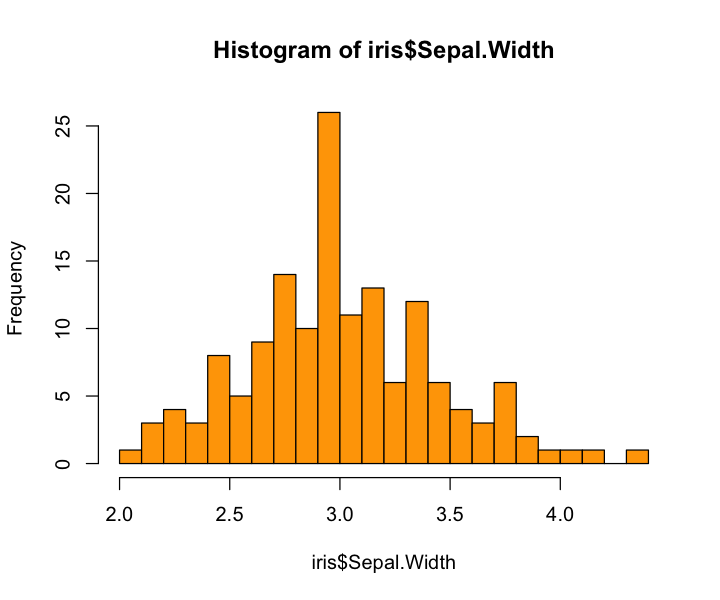

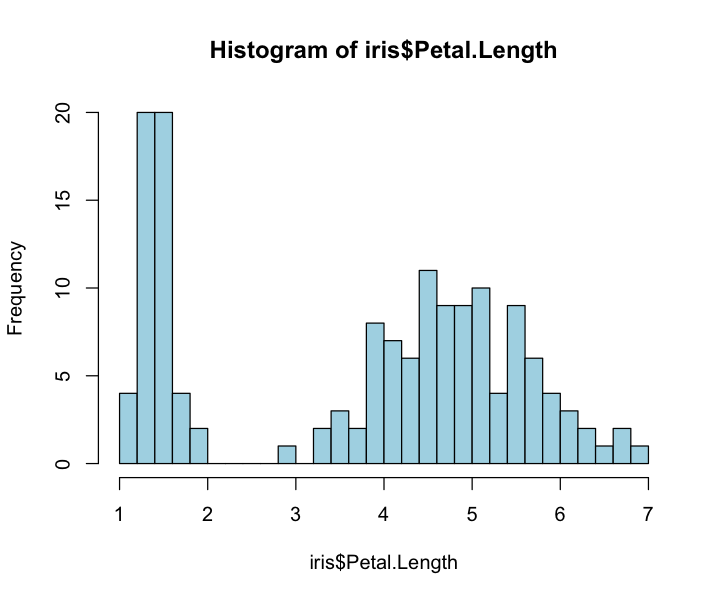

In [152]:
hist( iris$Sepal.Width, col="orange", breaks=20 )
hist( iris$Petal.Length, col="lightblue", breaks=40 )

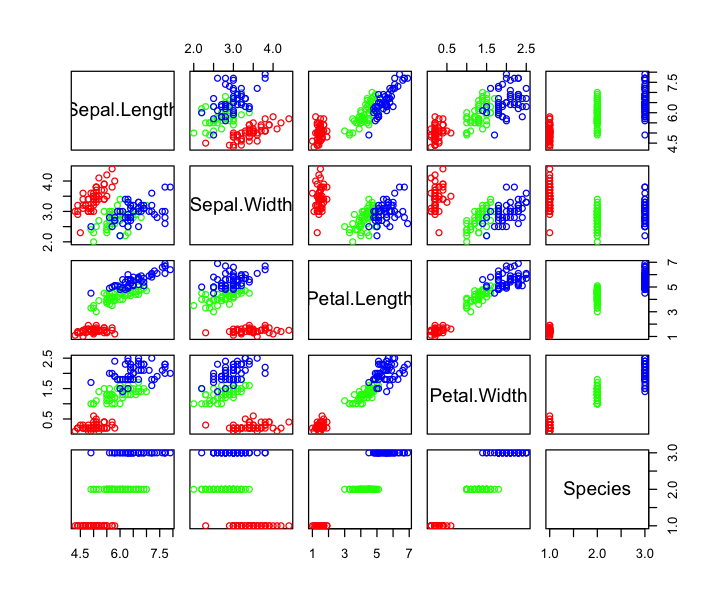

In [153]:
species_number = unclass(iris$Species)  # Three species:  setosa, virginica, veriscolor
colors = c("red","green","blue")

plot(iris, col=colors[species_number] )

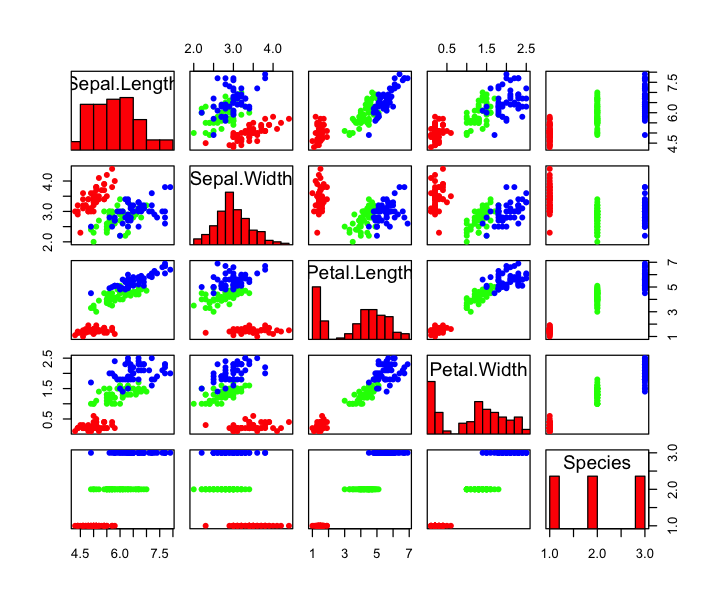

In [154]:
panel.hist = function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, ...)
}

pairs( iris, col=colors[species_number], pch=16, diag.panel = panel.hist )


There are a number of probability distributions that are vital for Exploratory Data Analysis:
<ul>
<li><a href="https://en.wikipedia.org/wiki/Normal_distribution">Normal (aka Gaussian)</a></li>
<li><a href="https://en.wikipedia.org/wiki/Student's_t_distribution">Student's t</a></li>
<li><a href="https://en.wikipedia.org/wiki/Cauchy_distribution">Cauchy</a></li>
<li><a href="https://en.wikipedia.org/wiki/Lognormal_distribution">Lognormal</a></li>
<li><a href="https://en.wikipedia.org/wiki/Chi_squared_distribution">$\chi^2$ (aka Chi-squared)</a></li>
<li><a href="https://en.wikipedia.org/wiki/Chi_squared_distribution">$\chi$ (aka Chi)</a></li>
<li><a href="https://en.wikipedia.org/wiki/Exponential_distribution">Exponential</a></li>
<li><a href="https://en.wikipedia.org/wiki/Pareto_distribution">Pareto (aka power law)</a></li>
</ul>
We review these here, along with basic operations that help explain why they arise.

## Distributions in R

In [155]:
? distribution

In [156]:
?dnorm

# pdf:       dnorm(x, mean = 0, sd = 1, log = FALSE)

# cdf:       pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)

# icdf:      qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)

# random:    rnorm(n, mean = 0, sd = 1)


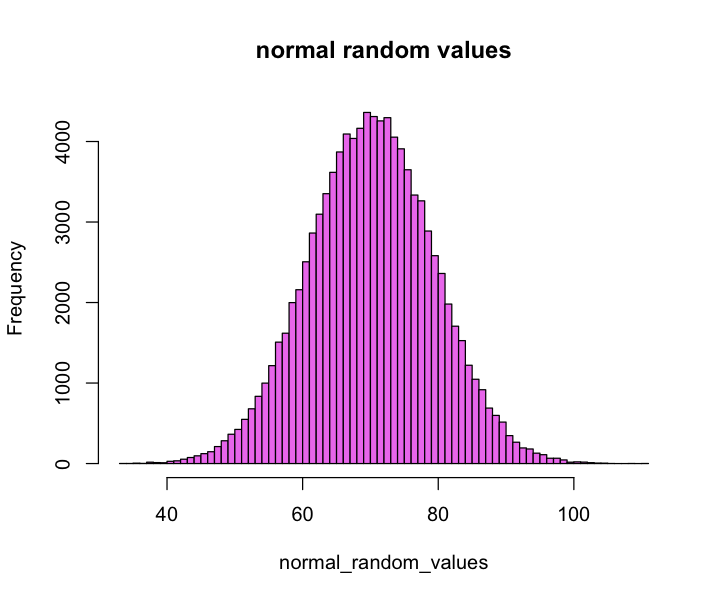

In [157]:
normal_random_values = rnorm(100000, mean=70.1, sd=9.2)

hist( normal_random_values, main="normal random values", col="violet", breaks=100 )

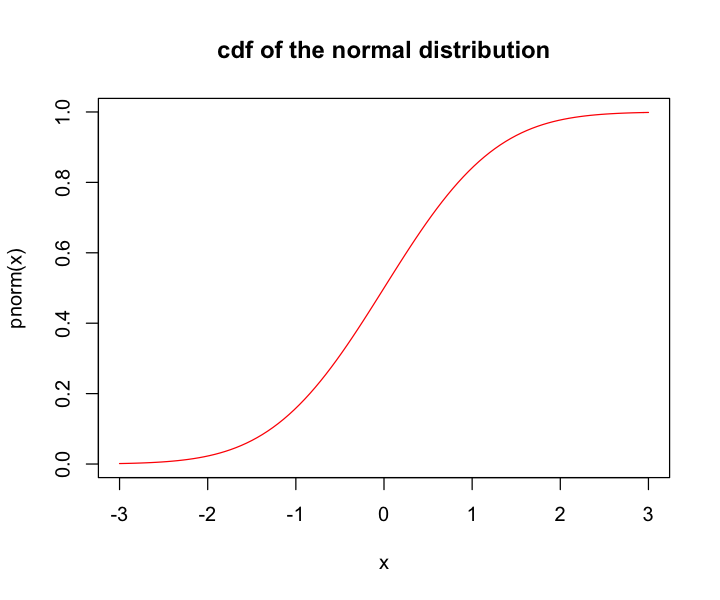

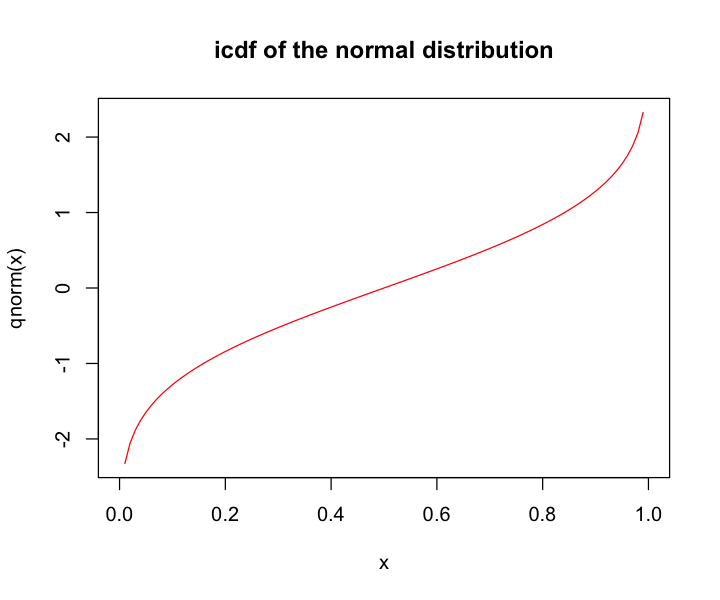

In [158]:
curve( pnorm(x), -3, 3, col="red", main="cdf of the normal distribution")
curve( qnorm(x), -0, 1, col="red", main="icdf of the normal distribution")

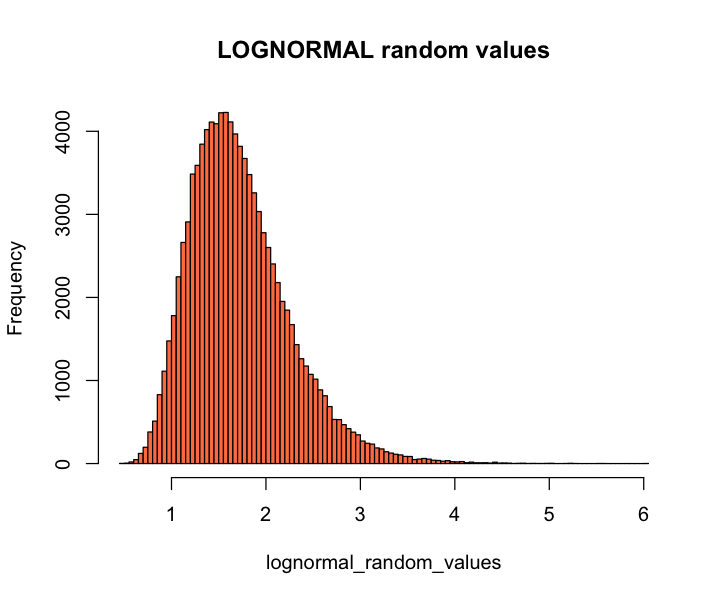

In [159]:
lognormal_random_values = rlnorm(100000, meanlog=0.5, sdlog=0.3)

hist( lognormal_random_values, main="LOGNORMAL random values", col="coral", breaks=100) 

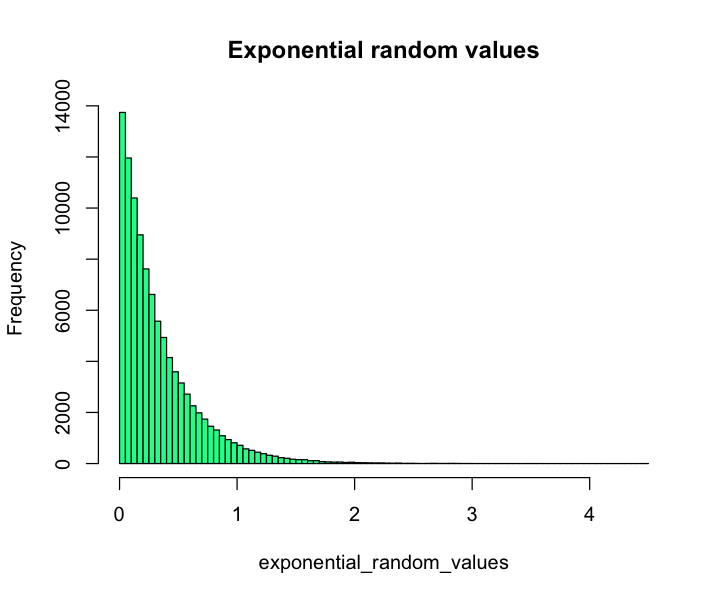

In [160]:
exponential_random_values = rexp(100000, rate=3.0)

hist( exponential_random_values, main="Exponential random values", col="mediumspringgreen", breaks=100 )

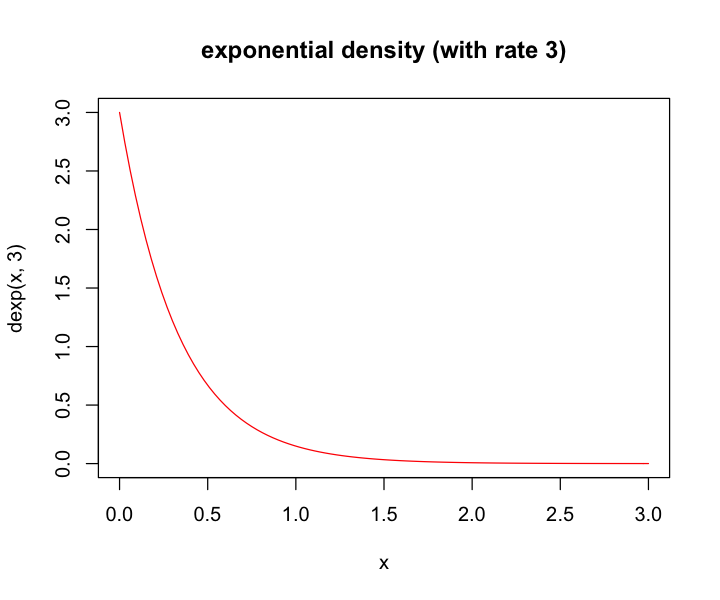

In [161]:
curve( dexp(x,3.0), 0, 3,  main="exponential density (with rate 3)", col="red")


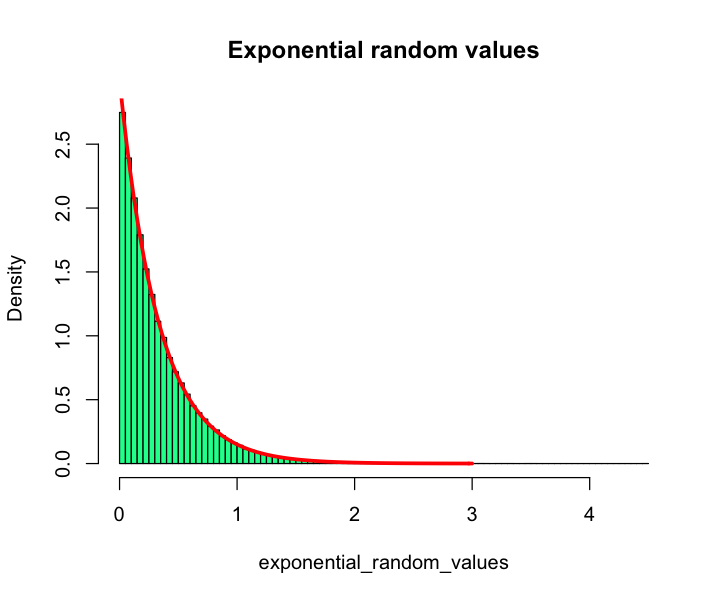

In [162]:
hist( exponential_random_values, main="Exponential random values",
     probability=TRUE,
     col="mediumspringgreen", breaks=100 )

curve( dexp(x,3.0), 0, 3,  main="exponential density (with rate 3)", col="red", lwd=3, add=TRUE)

## A Little History

The work of three historical figures led to the development of these distributions:
<ul>
<li><a href="http://en.wikipedia.org/wiki/Charles_Darwin">Charles Darwin</a> published <i>The Origin of Species</i> in 1859.</li>
<li><a href="http://en.wikipedia.org/wiki/Charles_Darwin">Francis Galton</a>, a first cousin of Charles Darwin (Erasmus Darwin was their grandfather), pursued research on heredity.  In 1869 he wrote <i>Hereditary Genius</i> about heredity and human intelligence.  He studied distributions of measurements among relatives, and ultimately developed the <i>bivariate normal distribution</i>, <i>regression</i>, and <i>correlation</i>.</li>
<li><a href="http://en.wikipedia.org/wiki/Charles_Darwin">Karl Pearson</a> in 1895 developed the basic families of <a href="https://en.wikipedia.org/wiki/Pearson_distribution">Pearson Distribution</a> still used today.  The four parameters of these distributions were a kind of "genome" for distributions, and encouraged a parameter-fitting approach to science.  In 1901 he cofounded the journal <i>Biometrika</i> with Galton, with the aim of developing statistics as a discipline.  He also developed <i>Pearson's correlation coefficient</i>, as well as the $\chi^2$ distribution and $\chi^2$ test.</li>
</ul>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Galton%27s_correlation_diagram_1875.jpg/708px-Galton%27s_correlation_diagram_1875.jpg">Galton's correlation diagram, 1875</img>

       vars   n  mean   sd median trimmed  mad  min  max range  skew kurtosis
parent    1 928 68.31 1.79   68.5   68.32 1.48 64.0 73.0     9 -0.04     0.05
child     2 928 68.09 2.52   68.2   68.12 2.97 61.7 73.7    12 -0.09    -0.35
         se
parent 0.06
child  0.08


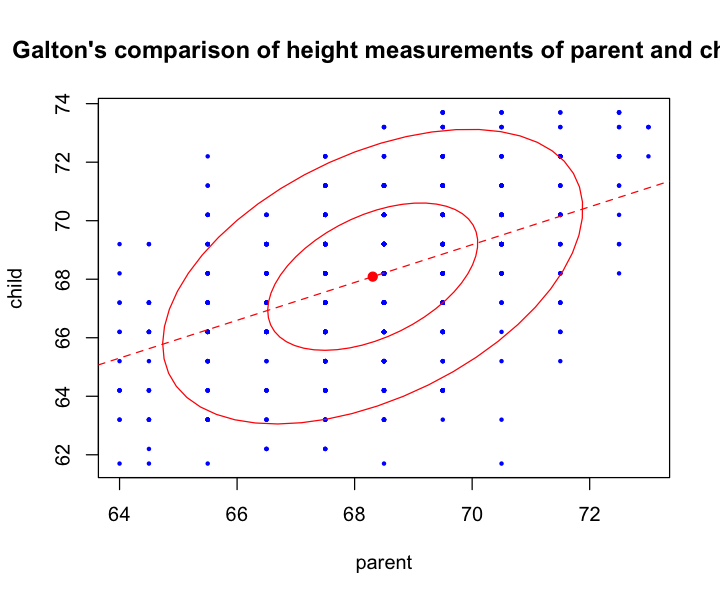

In [163]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1]) 

if (not.installed("psych")) install.packages("psych")  # psych has the Galton dataset
library(psych)

# parent height vs child height:  928 x 2 table
data(galton)

# Galton, F. (1886). "Regression towards mediocrity in hereditary stature".
# The Journal of the Anthropological Institute of Great Britain and Ireland 15: 246-263. 
# doi:10.2307/2841583 -- JSTOR 2841583.

print( describe(galton) )

plot(galton, pch=16, col="blue", main="Galton's comparison of height measurements of parent and child", cex=0.5)

# Regression to the mean:  following an extreme random event, the next random event is likely to be less extreme.

ellipses(galton, add=TRUE, smooth=FALSE, lm=TRUE)  # add a linear model through the data

#  Ellipse dimensions are calculated from the correlation r
#  between the x and y variables and are scaled as sqrt(1+r) and sqrt(1-r).


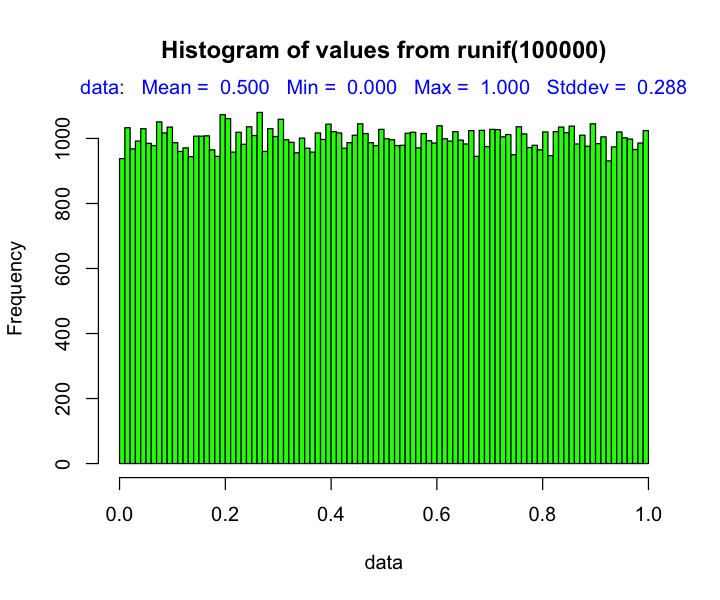

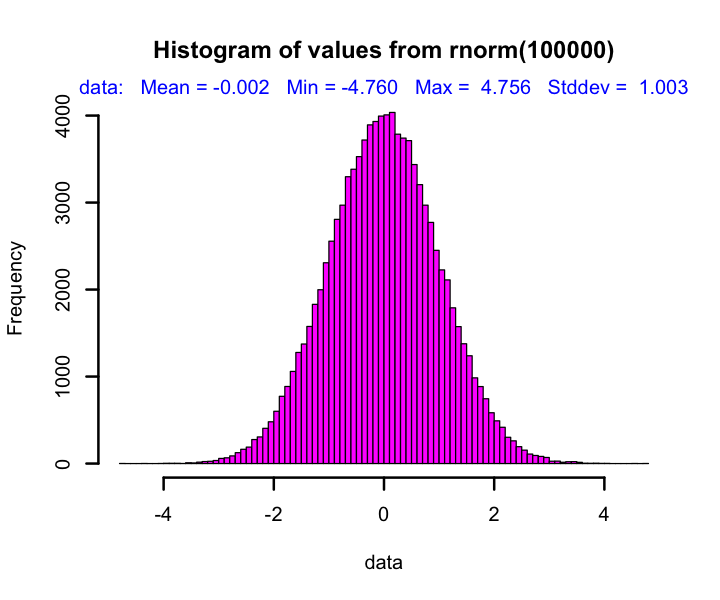

In [164]:
#
# Displaying two histograms, of uniform and normal random values.
#

annotate_plot_with_parameters = function(x, line=0, ...) {
 mtext(sprintf("%s:   Mean = %6.3f   Min = %6.3f   Max = %6.3f   Stddev = %6.3f",
  paste(deparse(substitute(x))),
    # R uses call by name !!  This incantation obtains the input expression as a string !!
  mean(x),min(x),max(x),sd(x)), line=line, col="blue", ...)
}

data = runif(100000)
hist(data, breaks=100, col="green",main="Histogram of values from runif(100000)")
annotate_plot_with_parameters(data, 0)

data = rnorm(100000)
hist(data, breaks=100, col="magenta", lwd=2, main="Histogram of values from rnorm(100000)")
annotate_plot_with_parameters(data, 0)



## The Student t and Cauchy distributions:  two distributions that are "almost" normal

If $\xi = \xi_1 + \cdots + \xi_n$ is a sum of $n$ normal random variables with mean 0 and variance $\sigma^2$, and $\eta = \sqrt{ \frac{1}{n} \sum_{i=1}^n \xi_i^2 }$, then
$$t = \frac{\xi}{\eta} = \frac{\sum_i x_i}{\sqrt{(\sum_i \xi^2)/n}}$$
follows the Student $t$ distribution with parameter $n$ ("$n$ degrees of freedom").

###  Student's t distribution

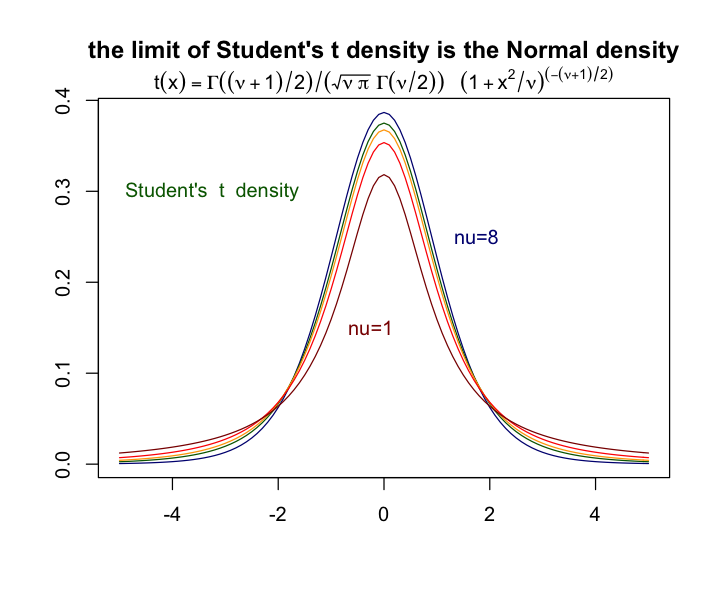

In [165]:
plot( function(x) dt(x,8),-5,5, col="navy",     xlab="", ylab="",
 main="the limit of Student's t density is the Normal density" )
curve( dt(x,4),-5,5, add=TRUE, col="darkgreen", ylab="")
curve( dt(x,3),-5,5, add=TRUE, col="orange",    ylab="")
curve( dt(x,2),-5,5, add=TRUE, col="red",       ylab="")
curve( dt(x,1),-5,5, add=TRUE, col="darkred",   ylab="")
text( -0.25,0.15, "nu=1", col="darkred")
text(  1.75,0.25, "nu=8", col="navy")
text( -3.25,0.3, "Student's  t  density", col="darkgreen")
mtext( expression( t(x) == Gamma((nu+1)/2)/(sqrt(nu ~ pi) ~ Gamma(nu/2)) ~ ~ ~ (1 + x^2/nu)^(-(nu+1)/2) ) )

### The Cauchy distribution

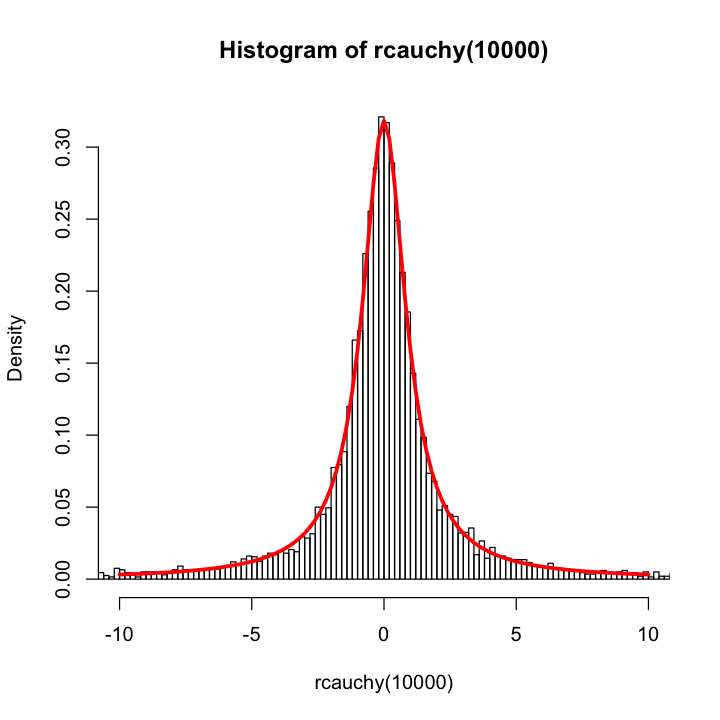

In [201]:
hist(rcauchy( 10000 ), probability=TRUE, breaks=10000, xlim=c(-10,10) )

curve( dcauchy(x), add=TRUE, col="red", lwd=3 )

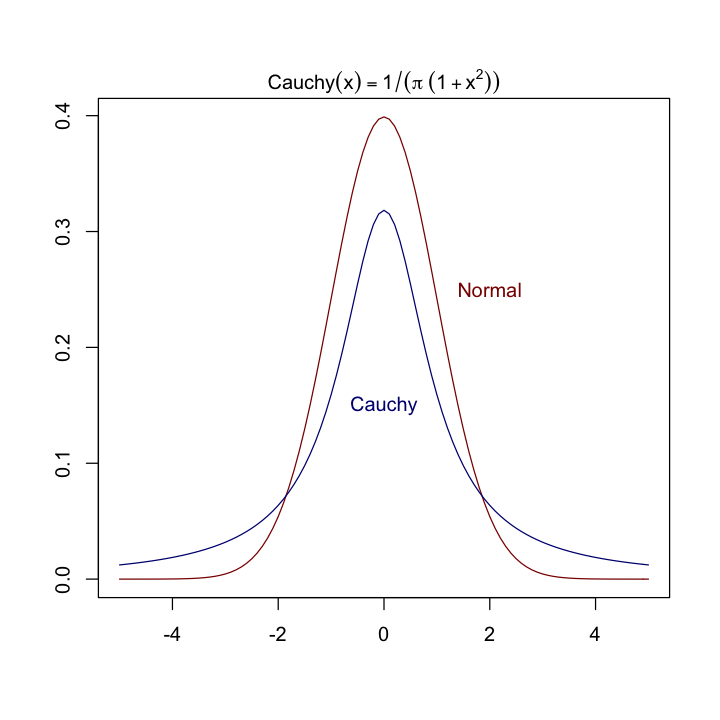

In [200]:
plot(  dnorm,  -5,5, col="darkred", xlab="", ylab="")
curve( dcauchy,-5,5, add=TRUE, col="navy", xlab="", ylab="")
mtext( expression( Cauchy(x) == 1/(pi ~ (1+x^2)) ))
text(0,0.15,"Cauchy", col="navy")
text(2,0.25,"Normal", col="darkred")

Notice that the Cauchy distribution is the special case of the $t$ distribution where $n=1$.

The Normal/Gaussian distribution and Cauchy distribution are remarkable in that they are both <i>stable</i>:
<ul>
<li>A sum of Normal random variables has a Normal distribution.</li>
<li>A sum of Cauchy random variables has a Cauchy distribution.</li>
</ul>

## The $\chi^2$ Distribution:  an important skewed (asymmetric) distribution

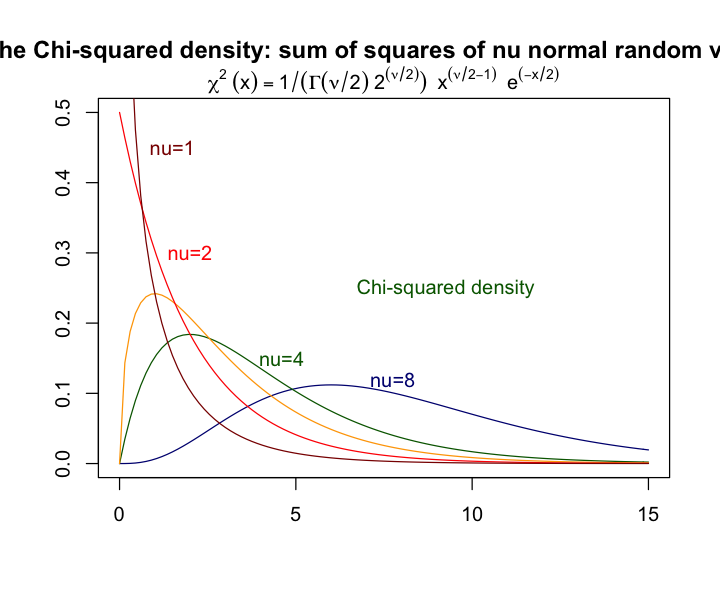

In [168]:
plot( function(x) dchisq(x,8), 0,15, ylim=c(0,0.5), col="navy", xlab="", ylab="",
   main="The Chi-squared density: sum of squares of nu normal random values" )
curve( dchisq(x,4), 0,15, add=TRUE, col="darkgreen", ylab="")
curve( dchisq(x,3), 0,15, add=TRUE, col="orange",    ylab="")
curve( dchisq(x,2), 0,15, add=TRUE, col="red",       ylab="")
curve( dchisq(x,1), 0,15, add=TRUE, col="darkred",   ylab="")
text(  1.50,0.45, "nu=1", col="darkred")
text(  2.00,0.30, "nu=2", col="red")
text(  4.60,0.15, "nu=4", col="darkgreen")
text(  7.75,0.12, "nu=8", col="navy")
text(  9.25,0.25, "Chi-squared density", col="darkgreen")
mtext( expression( chi^2 ~ (x) == 1/(Gamma(nu/2) ~ 2^(nu/2)) ~~ x^(nu/2 - 1) ~~ e^(-x/2) ))

## Pearson's  $\chi$ Distribution:  `square root' of $\chi^2$

The $\chi$ distribution represents <u>the square root of</u> the sum of squared normal random variables.



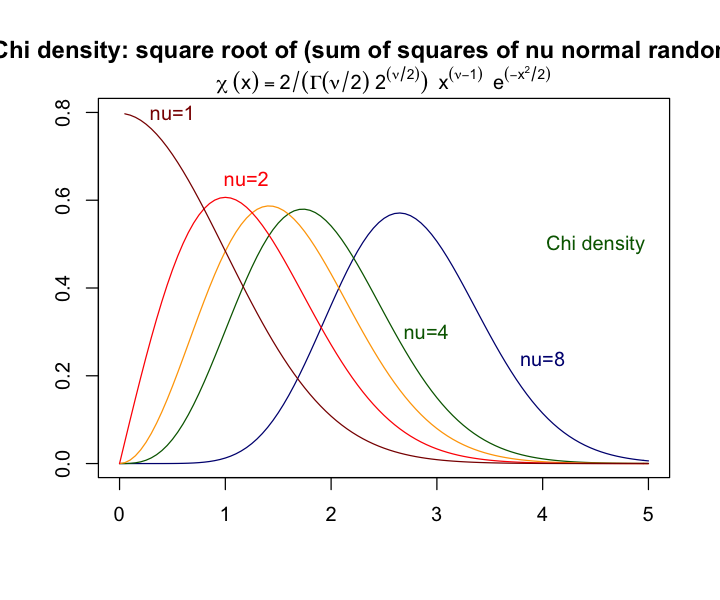

In [169]:
dchi = function(x,n) dchisq(x^2,n) * (2*x)   # the (2*x) comes from the change of variables from x^2

plot( function(x) dchi(x,8), 0,5, ylim=c(0,0.8), col="navy", xlab="", ylab="",
   main="The Chi density: square root of (sum of squares of nu normal random values)" )
curve( dchi(x,4), 0,5, add=TRUE, col="darkgreen", ylab="")
curve( dchi(x,3), 0,5, add=TRUE, col="orange",    ylab="")
curve( dchi(x,2), 0,5, add=TRUE, col="red",       ylab="")
curve( dchi(x,1), 0,5, add=TRUE, col="darkred",   ylab="")
text(  0.50,0.8, "nu=1", col="darkred")
text(  1.2,0.65, "nu=2", col="red")
text(  2.9,0.30, "nu=4", col="darkgreen")
text(  4.0,0.24, "nu=8", col="navy")
text(  4.5,0.50, "Chi density", col="darkgreen")
mtext( expression( chi ~ (x) == 2/(Gamma(nu/2) ~ 2^(nu/2)) ~~ x^(nu - 1) ~~ e^(-x^2/2) ))


## Pearson's 6 families of distributions

A Pearson <i>probability density function</i> $p$ is defined to be any valid solution to the differential equation $$\frac{p'(x)}{p(x)} + \frac{a+x-\lambda}{b_2 (x-\lambda)^2 + b_1 (x-\lambda) + b_0} = 0,$$
with the four parameters $a$, $b_0$, $b_1$, $b_2$.  This definition covers the beta, gamma, normal, t, and other definitions.

##The Exponential family of distributions

If you look up the density functions of most distributions people use today, you'll notice they often have an "exponential" form like $c x^k e^{-f(x)}$.

More generally, we can define a broad class of distributions as having a pdf of the form
$$p(x) = exp(\eta(\theta) T(x) + B(x) - A(\theta))$$ where $\theta$ is a set of parameters.
With the right choice of functions $\eta(\theta)$, $T(x)$, $A(\theta)$, $B(x)$,
this family can cover most commonly-used distributions.
See e.g., <a href="https://en.wikipedia.org/wiki/Exponential_family">the Wikipedia page on exponential distributions</a>.

## Pearson's Method for Fitting Distribution Parameters: the Chi-square test

Pearson developed a way to measure the difference between an
observed distribution (histogram) and a mathematical distribution: the $\chi^2$-test
    (<a href="http://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test">Wikipedia article</a>).
    
Given an observed histogram with bins $O_i$, and a corresponding theoretical distribution with expected values $E_i$,
the test computes
$$
\chi^2 ~~=~~ \sum_{i=1}^n ~ \frac{(O_i - E_i)^2}{E_i} 
$$
and determines the probability of obtaining such a large value in a $\chi^2$ distribution with $n-1$ degrees of freedom.
(In other words, if $n$ is the number of bins in the histogram, $n-1$ is the number of degrees of freedom used
in performing the $\chi^2$ test.)

chi-squared value = 13.1800
probability of getting a smaller value =  0.1708


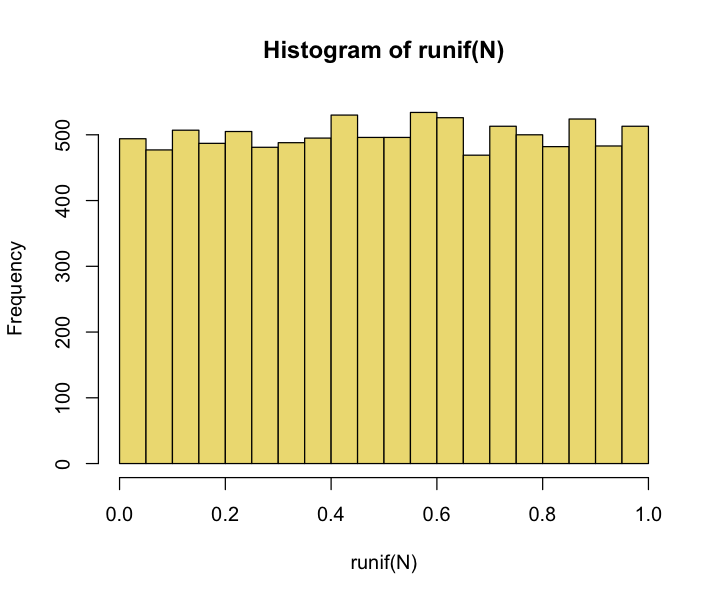

In [170]:
UniformChiSqTest <- function(h) {
   hbins = h$counts           # vector of bin counts in histogram h
   N = sum(hbins)             # total of all bin counts in histogram h
   nbins = length(hbins)      # the number of bins in h
   p = rep( 1/nbins, nbins )  # uniform expected probability values
   ChiSqValue = sum( (hbins - N*p)^2 / (N*p) )
   ChiSqProb = pchisq(ChiSqValue, df = nbins-1)
   cat(sprintf( "chi-squared value = %7.4f\n", ChiSqValue))
   cat(sprintf( "probability of getting a smaller value = %7.4f\n", ChiSqProb ))
}

# demo whether the runif() random number generator yields a uniform histogram

N = 10000
runifHistogram = hist(runif(N), col="lightgoldenrod")
UniformChiSqTest( runifHistogram )

chi-squared value = 15.3743
probability of getting a smaller value =  0.0086


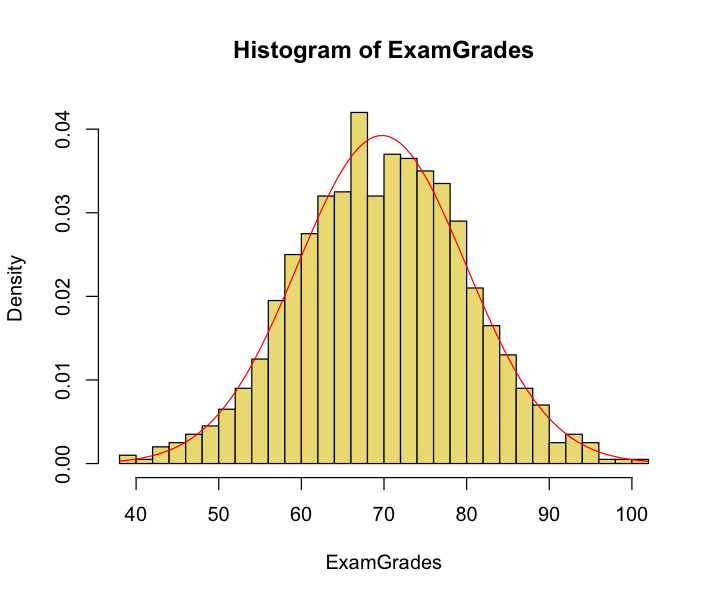

In [171]:
ExamGrades = rnorm( 1000, mean=70, sd=10 )
GradeHistogram = hist( ExamGrades, col="lightgoldenrod", breaks=25, probability=TRUE )

NormalChiSqTest <- function(h, mu, sigma) {
   hbins = h$counts           # vector of bin counts in histogram h
   N = sum(hbins)             # total of all bin counts in histogram h
   nbins = length(hbins)      # the number of bins in h
   intervals = seq(mu-3*sigma, mu+3*sigma, length=nbins+1)
   p = diff( pnorm( intervals, mean=mu, sd=sigma ) )
   ChiSqValue = sum( (hbins - N*p)^2 / (N*p) )
   ChiSqProb = pchisq(ChiSqValue, df = nbins-1)
   cat(sprintf( "chi-squared value = %7.4f\n", ChiSqValue))
   cat(sprintf( "probability of getting a smaller value = %7.4f\n", ChiSqProb ))
}


mu = mean(ExamGrades)
sigma = sd(ExamGrades)
NormalChiSqTest( GradeHistogram, mu, sigma )

curve( dnorm(x, mean=mu, sd=sigma), col="red", add=TRUE )  # add the fitted normal curve



Two problems with using the $\chi^2$ test for fitting distributions:
    <ul>
    <li>this method only lets us <i>check</i> parameter values, not derive them.</li>
    <li>this method does not deal well with distributions having long tails, like the normal distribution...</li>
    </ul>

# A Better Way to Fit Distribution Parameters:  Fisher's Maximum Likelihood

We can fit a distribution using the method of <b>Maximum Likelihood</b>.  With a given dataset $D$, the <i>fitdistr</i> function (in the MASS library) derives parameters $\theta$ (like $a,\,b_0,\,b_1,\,b_2$) for a distribution by optimizing a likelihood function $L(\theta \mid D)$.
<br/><br/>
The likelihood function is proportional to $P(D \mid \theta)$ -- it computes the product of probabilities of occurrence $p(d,\theta)$ of all points $d$ in the dataset $D$.  Thus
Likelihood$({\theta} \mid D)$ ~~=~~ Prob$({D \mid {\theta}})$ ~~=~~ $\prod_{d \in D}$ Prob$(d \mid {\theta})$.
<br/><br/>
The <i>fitdistr</i> function actually computes log-Likelihood, a sum of log-probabilities.
It uses a builtin optimization procedure to find locally optimal parameters $\theta$.

In [172]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package
    
library(MASS)  #  load the MASS package

In [173]:

D = rnorm( 10000, mean=70, sd=10 )  # a random dataset

estimated_parameters = fitdistr( D, "t", df = 23 )

print(estimated_parameters)

cat(sprintf("final log-likelihood score = %f", estimated_parameters$loglik))



        m             s     
  69.95925470    9.62605341 
 ( 0.10022762) ( 0.07205561)
final log-likelihood score = -37247.979855

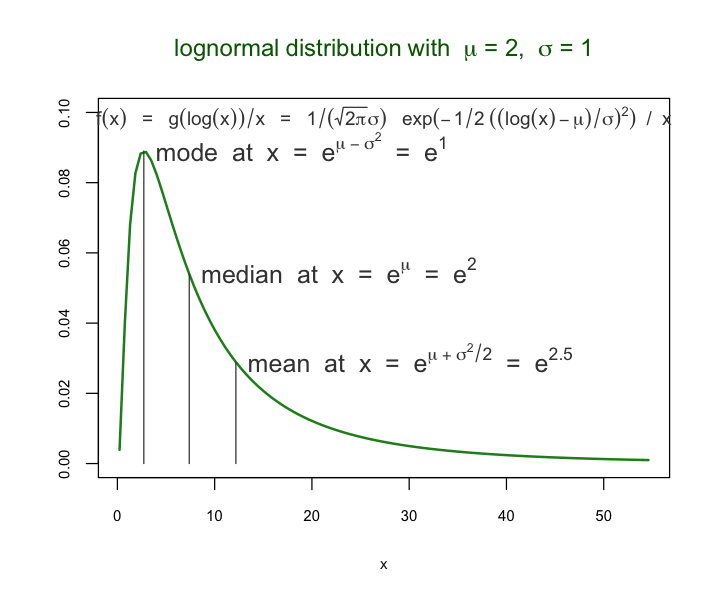

In [174]:
mu = exp(2)
mulog = log(mu)
sigma = 1
sigmalog = (1)
lnorm = function(x) dlnorm(x, meanlog=mulog, sdlog=sigmalog)

curve( lnorm, exp(-1.5), exp(4.0), col="forestgreen",
      main=expression(lognormal ~ distribution ~ with * "  " * mu * " = " * 2 * ",  " * sigma * " = " * 1),
      ylim = c(0,0.1), cex.axis=0.75, cex.main=1.2, ylab="",
      cex.lab = 0.75, lwd = 2, col.main="darkgreen", col.lab="gray10" )

    
x = exp(mulog)
points( c(x,x), c(0,lnorm(x)), col="gray25", type="l")
text( x, lnorm(x), expression( median * "  " * at * "  " * x * "  =  " * e^mu * "  =  " * e^2),
     col="gray25", pos=4, offset=0.5, cex=1.25)

x = exp(mulog + sigma^2/2)
points( c(x,x), c(0,lnorm(x)), col="gray25", type="l")
text( x, lnorm(x), expression( mean * "  " * at * "  " * x * "  =  " * e^{mu ~ + ~ sigma^2/2} * "  =  " * e^2.5),
     col="gray25", pos=4, offset=0.5, cex=1.25)

x = exp(mulog - sigma^2)
points( c(x,x), c(0,lnorm(x)), col="gray25", type="l")
text( x, lnorm(x), expression( mode * "  " * at * "  " * x * "  =  " * e^{mu ~ - ~ sigma^2} * "  =  " * e^1),
     col="gray25", pos=4, offset=0.5, cex=1.25)
mtext( expression( f(x) ~ "  =  " ~ g(log(x))/x ~ "  =  " ~  1/(sqrt(2*pi) * sigma) ~ " " ~ exp(-1/2 ~ ((log(x)-mu)/sigma)^2) ~ " / " ~ x),
      col="gray25", side=3, line=-1.5, cex=0.95)



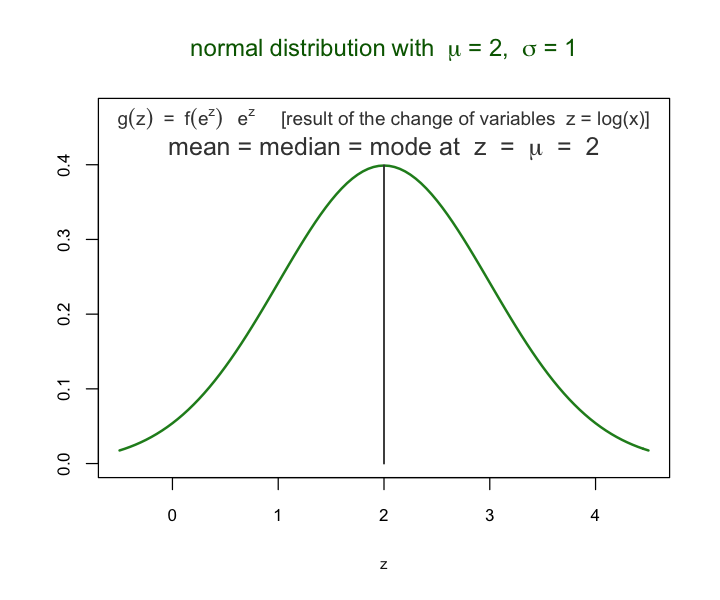

In [175]:
    transformed_lnorm = function(x) lnorm(exp(x)) * exp(x)
curve( transformed_lnorm, (-0.5), (4.5), col="forestgreen",
      main=expression(normal ~ distribution ~ with * "  " * mu * " = " * 2 * ",  " * sigma * " = " * 1),
      ylim = c(0,0.47), cex.axis=0.85, cex.main=1.2, xlab="z" , ylab="",
      cex.lab = 0.75, lwd = 2, col.main="darkgreen", col.lab="gray10")

x = (mulog)
points( c((x),(x)), c(0,transformed_lnorm(x)), col="gray25", lwd=1.5, type="l")
text( (x), transformed_lnorm(x), expression( "mean = median = mode at  " * z * "  =  " * mu * "  =  " * 2),
     col="gray25", pos=3, offset=0.25, cex=1.25)
mtext( expression( g(z) ~ " = " ~ f(e^z) ~ " " ~ e^z ~ "    [result of the change of variables  z = log(x)]"),
      col="gray25", side=3, line=-1.5, cex=0.95)

In a log-log plot, a lognormal distribution looks like a nice curved arc, because the log of the normal density is $-1/2 ((x-\mu)/\sigma)^2$ -- a parabola.  If $\sigma$ is large, the curve gets flatter.

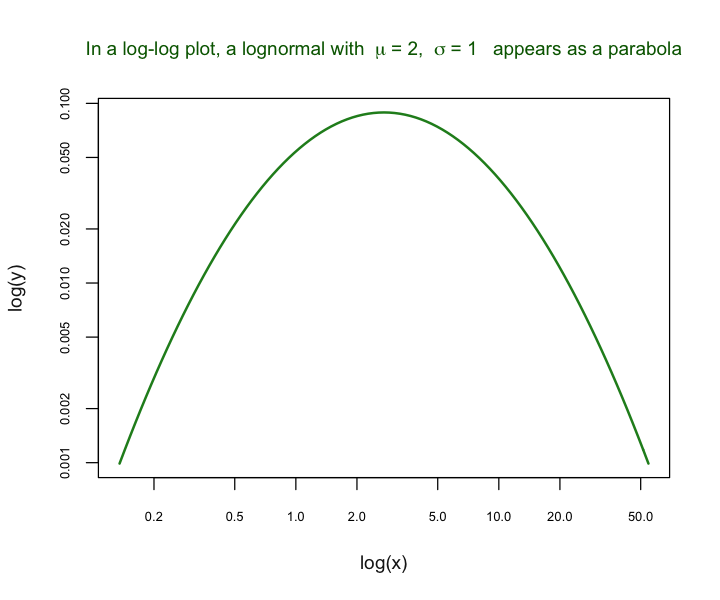

In [176]:
curve( dlnorm(x,meanlog=2,sdlog=1), exp(-2), exp(4),
      log="xy", ylab="log(y)", xlab="log(x)",
      main=expression("In a log-log plot, a lognormal with" * "  " * mu * " = " * 2 * ",  " * sigma * " = " * 1
                      ~ "  appears as a parabola"),
      cex.axis=0.65, cex.main=0.95, cex.lab = 0.95,
      lwd = 2, col="forestgreen", col.main="darkgreen", col.lab="gray10" )

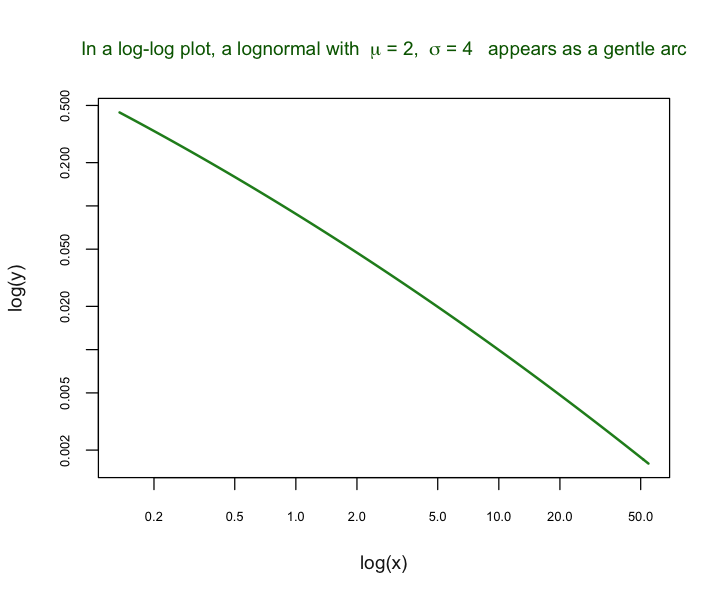

In [177]:
curve( dlnorm(x,meanlog=2,sdlog=4), exp(-2), exp(4),
      log="xy", ylab="log(y)", xlab="log(x)",
      main=expression("In a log-log plot, a lognormal with" * "  " * mu * " = " * 2 * ",  " * sigma * " = " * 4
                      ~ "  appears as a gentle arc"),
      cex.axis=0.65, cex.main=0.95, cex.lab = 0.95,
      lwd = 2, col="forestgreen", col.main="darkgreen", col.lab="gray10" )

# Summary:  Important distributions

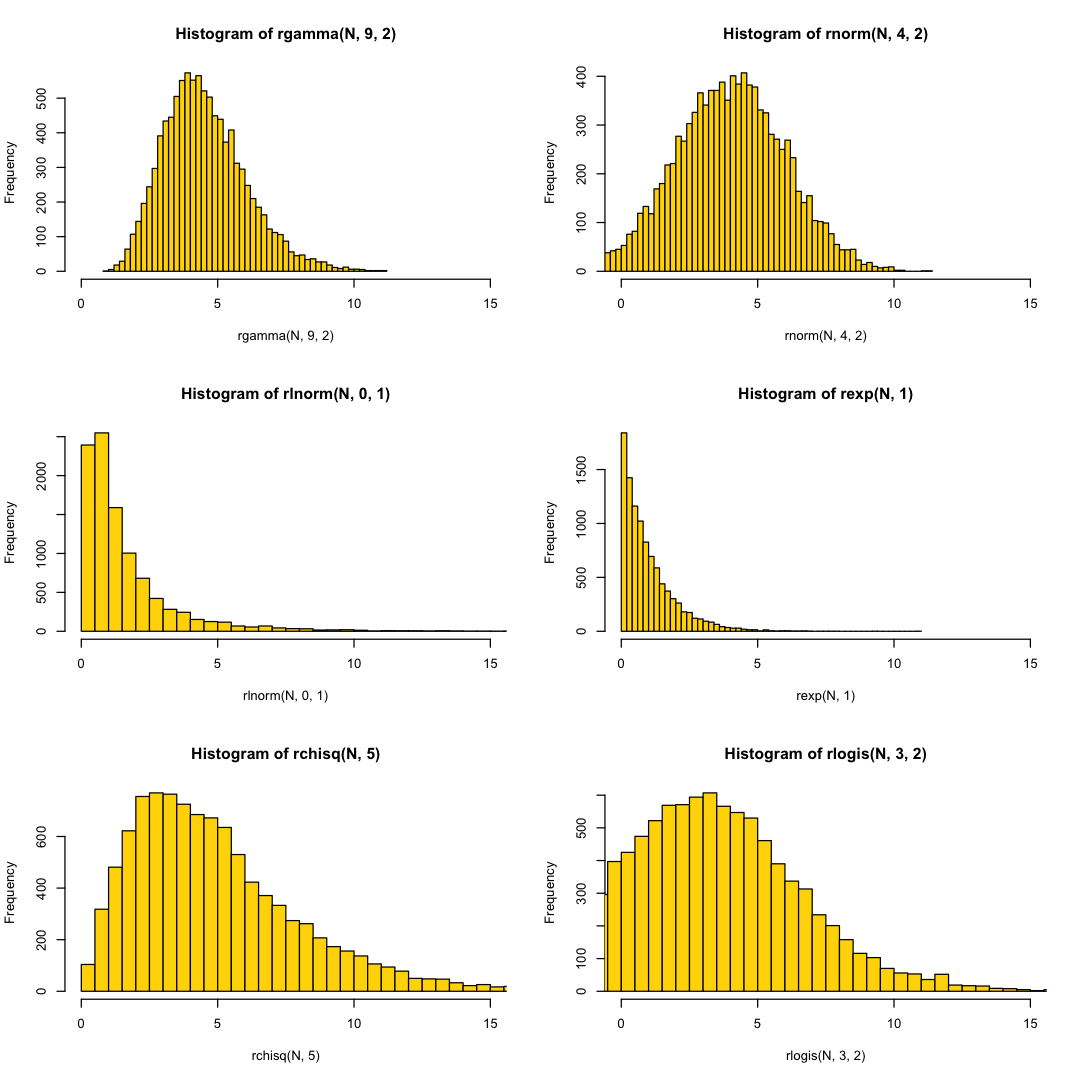

In [178]:
options( repr.plot.width=9, repr.plot.height=9 )

opar = par(mfrow = c(3,2))
# make a grid of 3 rows of plots, with 2 plots per row

N=10000
B=60
hist( rgamma(N, 9,2), col="gold", xlim=c(0,15), breaks=B )
hist( rnorm(N, 4,2), col="gold", xlim=c(0,15), breaks=B )
hist( rlnorm(N, 0,1), col="gold", xlim=c(0,15), breaks=B )
hist( rexp(N, 1), col="gold", xlim=c(0,15), breaks=B )
hist( rchisq(N, 5), col="gold", xlim=c(0,15), breaks=B )
hist( rlogis(N, 3,2), col="gold", xlim=c(0,15), breaks=B )

par(opar)  # restore previous values of plotting parameters


# Distributions as results of processes

## Sums of random variables often are normally distributed (The Central Limit Theorem)

There are many versions of the Central Limit Theorem, depending on conditions imposed on the random variables used.
See for example <a href="https://en.wikipedia.org/wiki/Central_limit_theorem">the Wikipedia page about the Central Limit Theorem</a>.

###Lindberg-Lévy version of the Central Limit Theorem:
Given an infinite sequence of i.i.d. random variables $\xi_i$ with mean $\mu$ and variance $\sigma^2$,
define the mean of the first $n$ variables  $S_n = (\xi_1\,+\,\ldots\,+\,\xi_n)/n$.
In the limit as $n \rightarrow \infty$, $\sqrt{n}(S_n - \mu)$ converges in distribution to a normal density with mean 0 and variance $\sigma^2$.

For not-perversely-distributed random variables, usually the convergence to a normal distribution is rapid.
If the variables $x_i$ are uniformly distributed, the convergence is already good for $n=3$, and hard to
distinguish from normal for $n=6$.  We show this below.

If we have not-perversely-distributed random variables, then, a corollary of the Central Limit Theorem is that
<i>sums of random variables have an approximately normal distribution</i>.



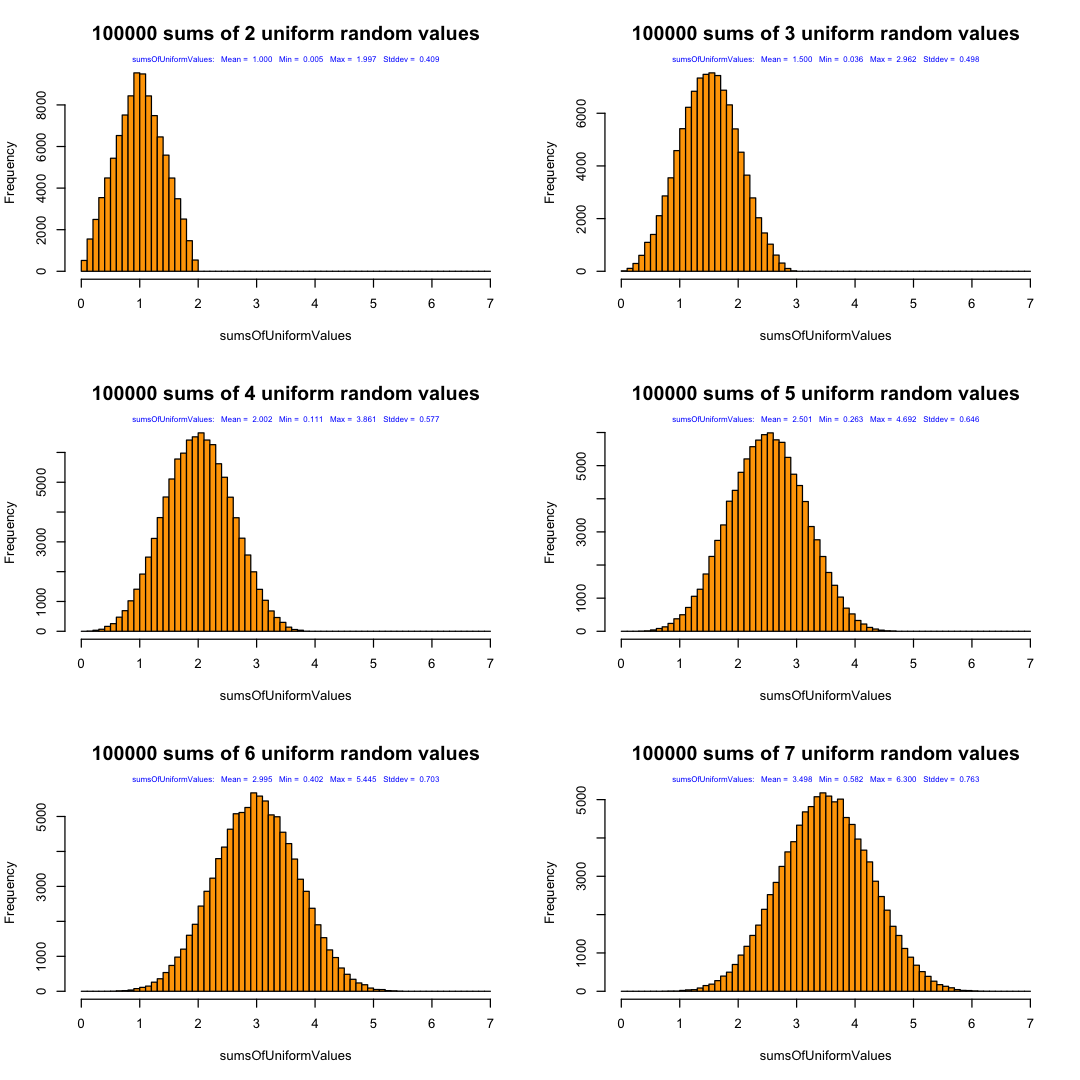

In [179]:
# Sums of uniform random variables

opar = par(mfrow=c(3,2))

N = 100000
SumSizes = 2:7

for (M in SumSizes) {
   sumsOfUniformValues = apply( matrix( runif(M*N), M,N), 2, sum ) 
     #  generate a MxN matrix of uniform random values, and then
     #  (with apply(...,2,sum))  sum up the columns -- giving N sums of M values.
    
   hist( sumsOfUniformValues,
        breaks=seq(0,max(SumSizes),by=0.1),
        cex.lab=1, cex.main=1.5, col="orange",
        main=sprintf("%d sums of %d uniform random values",N,M))
   annotate_plot_with_parameters(sumsOfUniformValues, 0, cex=0.4)
    
}
par(opar)

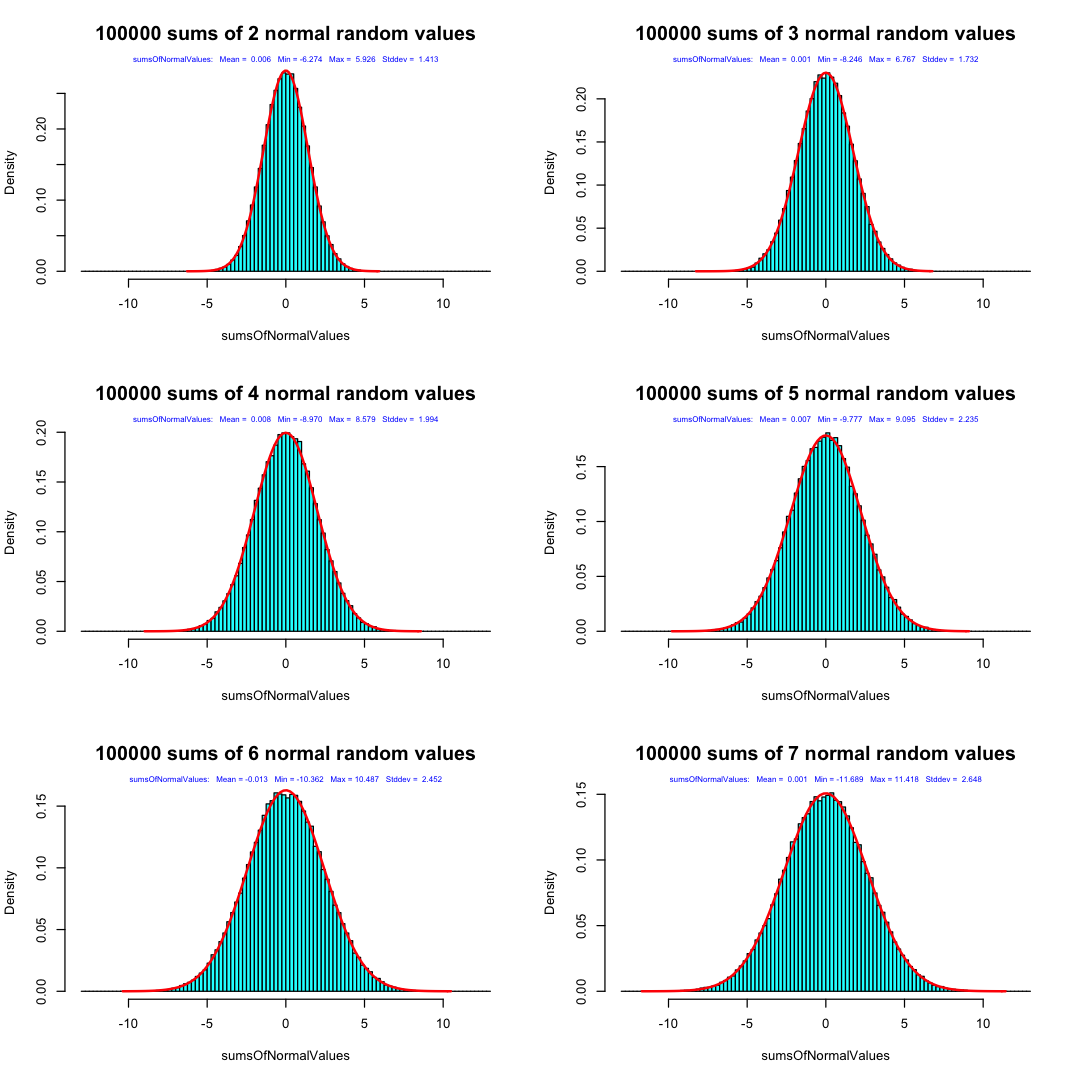

In [180]:
# ALL sums of normal random variables are normally distributed

opar = par(mfrow=c(3,2))

N = 100000
SumSizes = 2:7

for (M in SumSizes) {
   sumsOfNormalValues = apply( matrix( rnorm(M*N), M,N), 2, sum ) 
     #  generate a MxN matrix of normal random values, and then
     #  (with apply(...,2,sum))  sum up the columns -- giving N sums of M values.
    
   hist( sumsOfNormalValues,
        probability=TRUE,
        breaks=seq(-max(SumSizes)-6,max(SumSizes)+6, by=0.25),
        cex.lab=1.0, cex.main=1.5, col="cyan",
        main=sprintf("%d sums of %d normal random values",N,M))
   annotate_plot_with_parameters(sumsOfNormalValues, 0, cex=0.4)
    
   curve( dnorm(x, mean=0, sd=sqrt(M)),
         min(sumsOfNormalValues), max(sumsOfNormalValues),
         col="red", lwd=2, add=TRUE )
}
par(opar)

### Perverse random variables:  sums of squares of normally-distributed random variables are $\chi^2$-distributed.

How can random variables be perverse?  When the random variables are heavily skewed (like squared random variables), the convergence of the CLT can be slow.

A sum of <b>squares</b> of $\nu$ i.i.d. normal random variables (with mean 0 and variance 1) has a $\chi^2$ distribution with parameter $\nu$.

Actually, this is not an exception of the CLT --- in the limit as $\nu \rightarrow \infty$, the $\chi^2$ distribution tends to a normal distribution also.  However, $n$ must be large for the sum of $n$ squared random variables to converge.

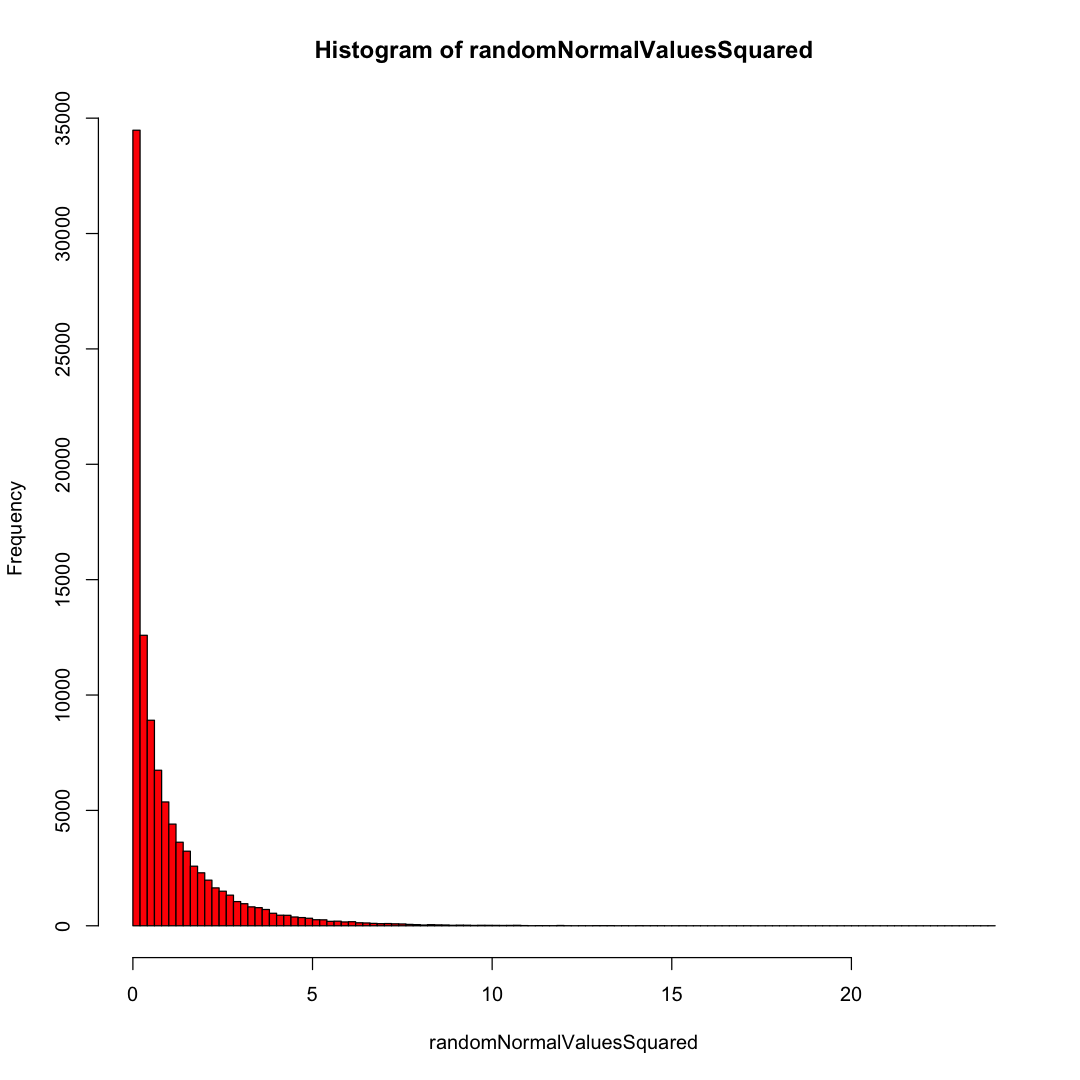

In [181]:
N = 100000

randomNormalValues = rnorm(N)

randomNormalValuesSquared = randomNormalValues^2

hist( randomNormalValuesSquared, breaks = 100, col="red" )

## The histogram of squared random normal values is highly skewed

Skewness (<a href="http://en.wikipedia.org/wiki/Kurtosis">wikipedia</a>)
is a measure of asymmetry of a distribution:
$$ skewness(x) = \frac{\sum_i(x_i - \mu)^3}{(\sum_i{(x_i - \mu)^2})^{3/2}}$$

Kurtosis (<a href="http://en.wikipedia.org/wiki/Kurtosis">wikipedia</a>)
is a measure of peakedness of a distribution:
$$ skewness(x) = \frac{\sum_i(x_i - \mu)^4}{(\sum_i{(x_i - \mu)^2})^{2}}$$

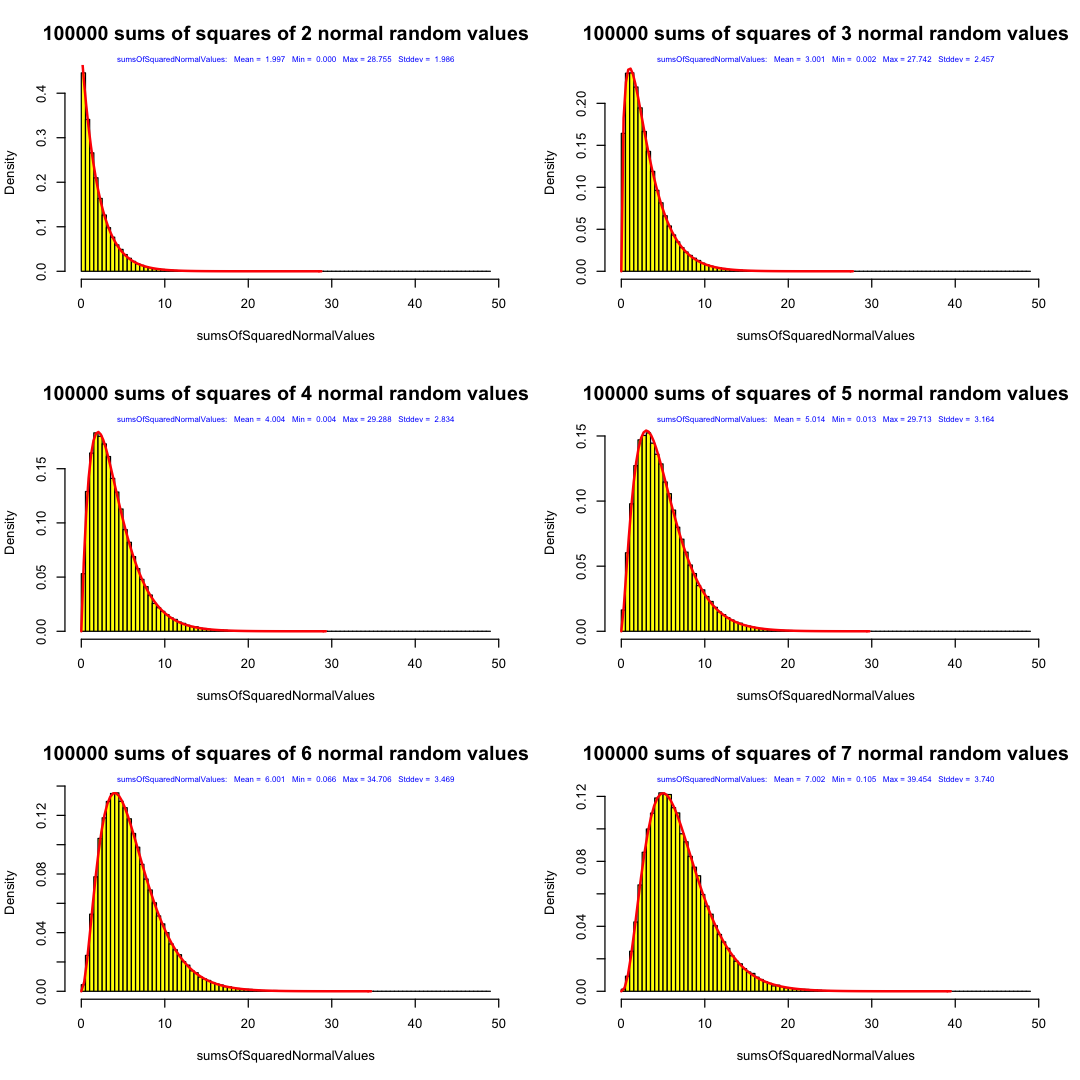

In [182]:
options( repr.plot.width=9, repr.plot.height=9 )

opar = par(mfrow=c(3,2))

# Sums of squares of normal random variables

N = 100000
SumSizes = 2:7

for (nu in SumSizes) {
   sumsOfSquaredNormalValues = apply( matrix( rnorm(nu*N)^2, nu,N), 2, sum )
     #  generate a MxN matrix of squared normal random values, and then
     #  (with apply(...,2,sum))  sum up the columns -- giving N sums of nu squared values.
    
   hist( sumsOfSquaredNormalValues,
        probability=TRUE,
        breaks=seq(0, 7*max(SumSizes), by=0.5),
        cex.lab=1.0, cex.main=1.5, col="yellow",
        main=sprintf("%d sums of squares of %d normal random values",N,nu))
   annotate_plot_with_parameters(sumsOfSquaredNormalValues, 0, cex=0.4)
    
   curve( dchisq(x, nu),
         0, max(sumsOfSquaredNormalValues),
         col="red", lwd=2, add=TRUE )
}
par(opar)

### Not quite as perverse: sums of squared uniform values appear $\chi^2$ distributed for small $n$ -- but converge a bit more quickly to a normal distribution.

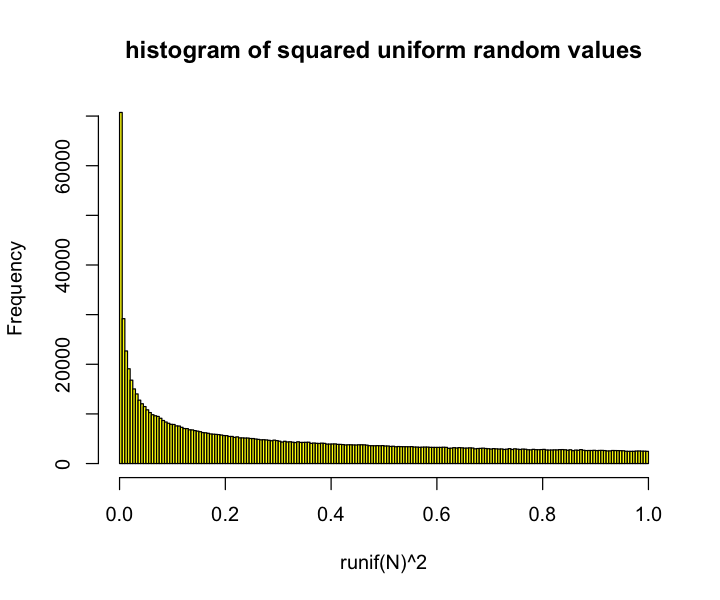

In [183]:
options( repr.plot.width=6, repr.plot.height=5 )

N = 1000000
hist( runif(N)^2, breaks=250, col="yellow", main="histogram of squared uniform random values" )

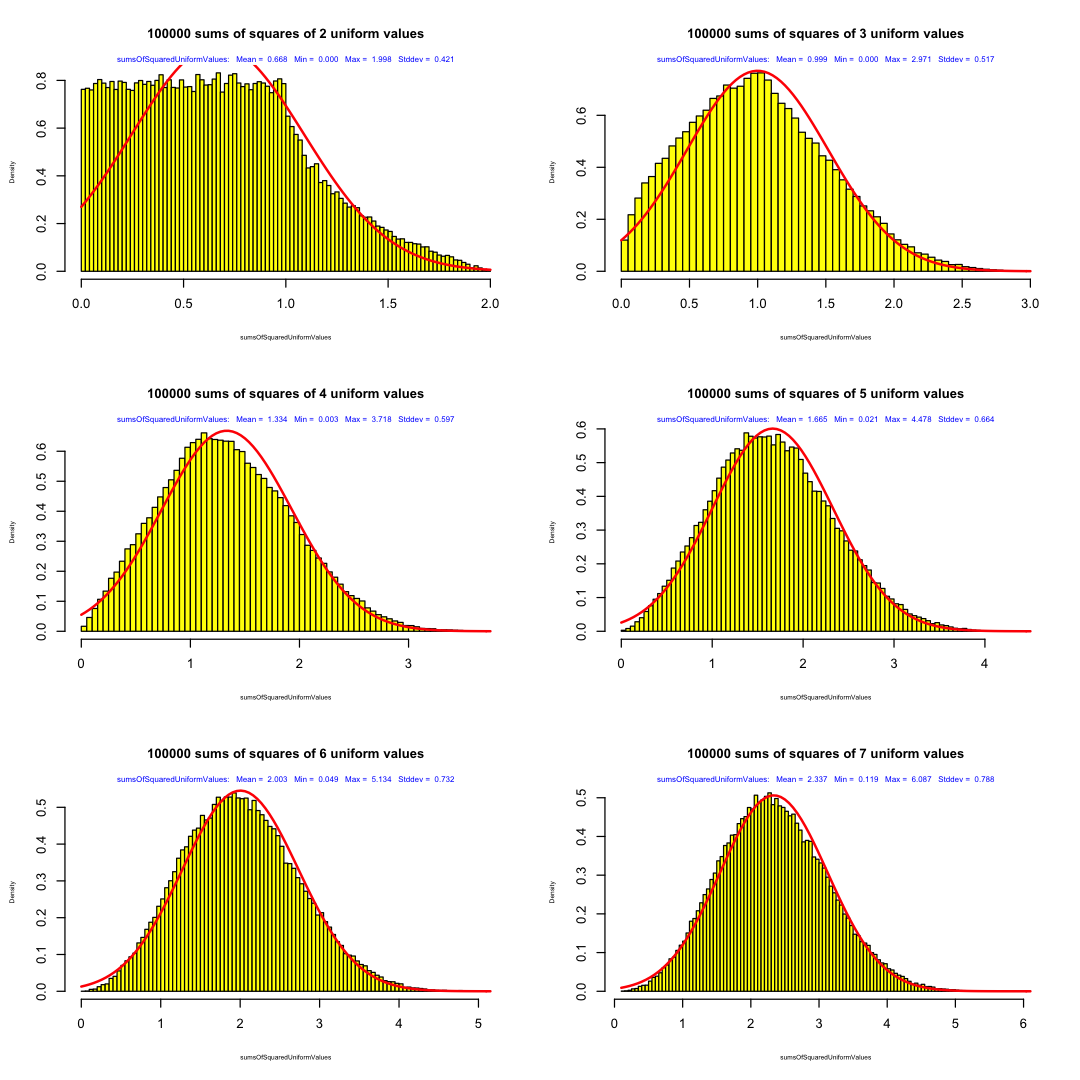

In [184]:
options( repr.plot.width=9, repr.plot.height=9 )

opar = par(mfrow=c(3,2))

# Sums of squares of uniform random values

N = 100000
SumSizes = 2:7

for (M in SumSizes) {
   sumsOfSquaredUniformValues = apply( matrix( runif(M*N)^2, M,N), 2, sum )
    
   hist( sumsOfSquaredUniformValues,
        probability=TRUE,
        breaks=100, # seq(0, 6*max(SumSizes), by=0.1),
        cex.lab=0.5, cex.main=1.0, col="yellow",
        main=sprintf("%d sums of squares of %d uniform values",N,M))
   annotate_plot_with_parameters(sumsOfSquaredUniformValues, 0, cex=0.4)

   curve( dnorm(x, mean=mean(sumsOfSquaredUniformValues), sd=sd(sumsOfSquaredUniformValues)),
         col="red", lwd=2, add=TRUE)
}
par(opar)

## Products of random variables are generally Lognormally-distributed

### A "Central Limit Theorem for Products":
For products of independent variables, by simply taking the log of the product and obtaining a sum, we can then apply the CLT.  Result: <i>the <b>product</b> of random variables tends to a <b>Lognormal</b> distribution.</i>



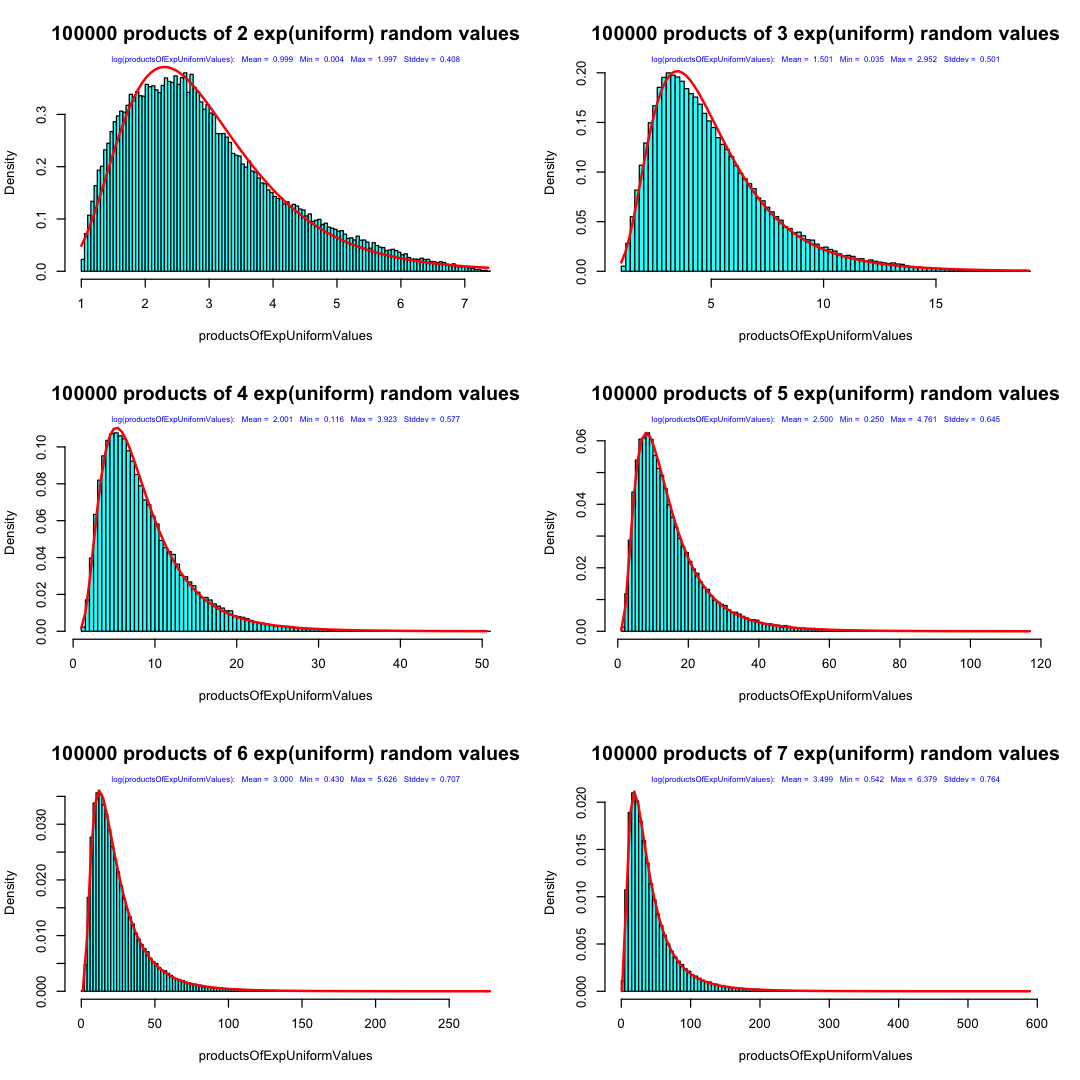

In [185]:
opar = par(mfrow=c(3,2))

N = 100000
ProductSizes = 2:7

for (M in ProductSizes) {
   productsOfExpUniformValues = apply( matrix( exp(runif(M*N)), M,N), 2,   prod   )
    
   hist( productsOfExpUniformValues,
        probability=TRUE,
        breaks=100, # seq(1,exp(max(ProductSizes)+6), by=0.1),
        cex.lab=1.0, cex.main=1.5, col="cyan",
        main=sprintf("%d products of %d exp(uniform) random values",N,M))
   annotate_plot_with_parameters(log(productsOfExpUniformValues), 0, cex=0.4)
    
   curve( dlnorm(x, meanlog=(M/2), sdlog=sqrt(M/12)),
         1, max(productsOfExpUniformValues),
         col="red", lwd=2, add=TRUE )
}
par(opar)

## Minima of uniform random variables tend toward an Exponential distribution.

This gives another interesting example of how key distributions emerge from processes.

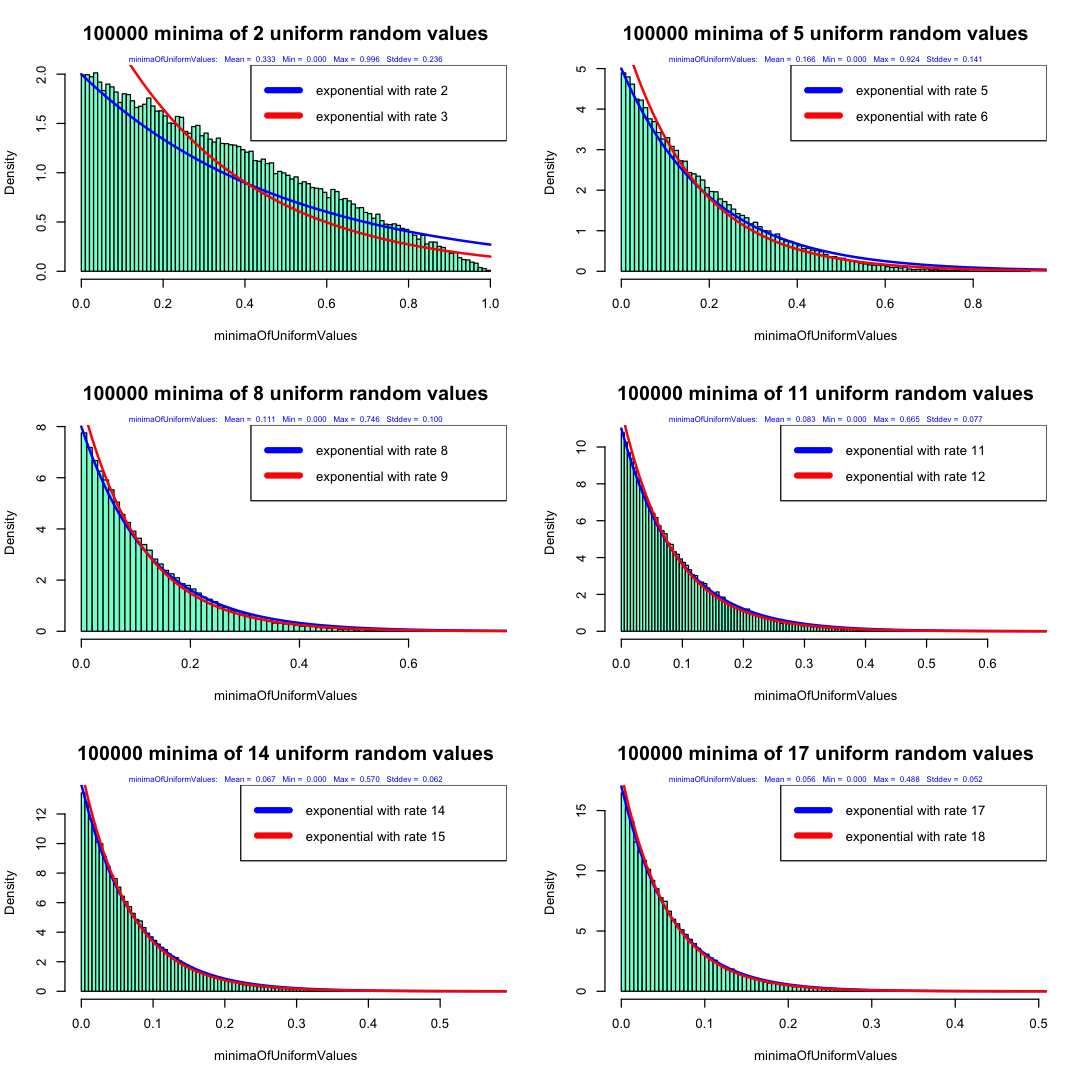

In [186]:
options( repr.plot.width=9, repr.plot.height=9 )

opar = par(mfrow=c(3,2))

N = 100000
MinimaSizes = seq(2,17,by=3)

for (M in MinimaSizes) {
   minimaOfUniformValues = apply( matrix( runif(M*N), M,N), 2,   min   ) 
    
   hist( minimaOfUniformValues,
        probability=TRUE,
        breaks=100,
        cex.lab=1.0, cex.main=1.5, col="aquamarine",
        main=sprintf("%d minima of %d uniform random values",N,M))
   annotate_plot_with_parameters(minimaOfUniformValues, 0, cex=0.4)

   curve( dexp(x,M),   0, 1, col="blue", lwd=2, add=TRUE )
   curve( dexp(x,M+1), 0, 1, col="red",  lwd=2, add=TRUE )
     #  the resulting distribution is a close match for the exponential distribution with rate M
   legend("topright", c(paste("exponential with rate",M), paste("exponential with rate",M+1)), 
          col=c("blue","red"), lwd=5 )
}

par(opar)

      rate    
  18.00450600 
 ( 0.05693525)
M = 12
log-likelihood score for estimate = 189062.206


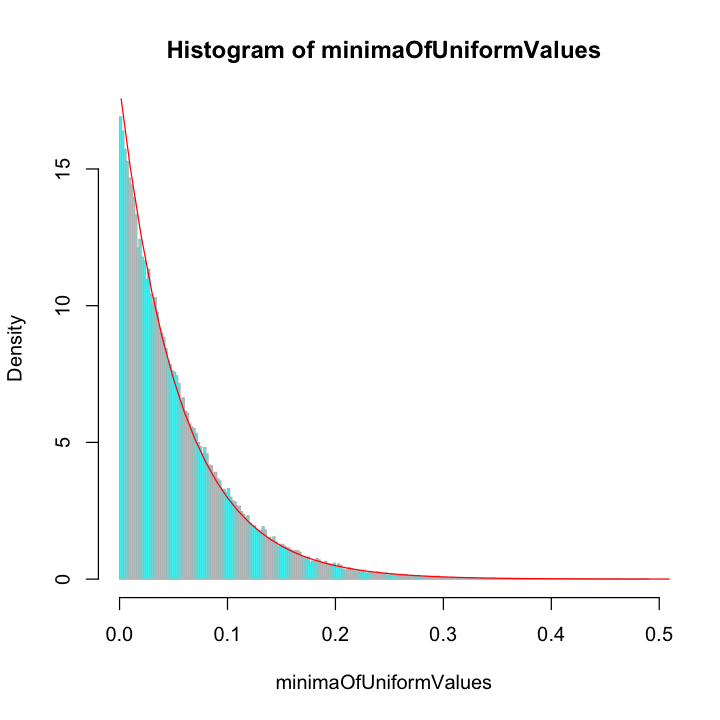

In [202]:
# let's see how well the final distribution above fits the Exponential distribution

options( repr.plot.width=6, repr.plot.height=6 )

exponential_fit = fitdistr( minimaOfUniformValues, "exponential" )  #  Maximum Likelihood estimate

print(exponential_fit)
cat(sprintf("M = %d\n",M))

cat(sprintf("log-likelihood score for estimate = %9.3f\n", exponential_fit$loglik))

hist( minimaOfUniformValues, breaks=250, probability=TRUE, border="gray", col="cyan" )

curve( dexp(x,rate=exponential_fit$estimate), 0, 1, col="red", add=TRUE )

### There are many other processes we can consider

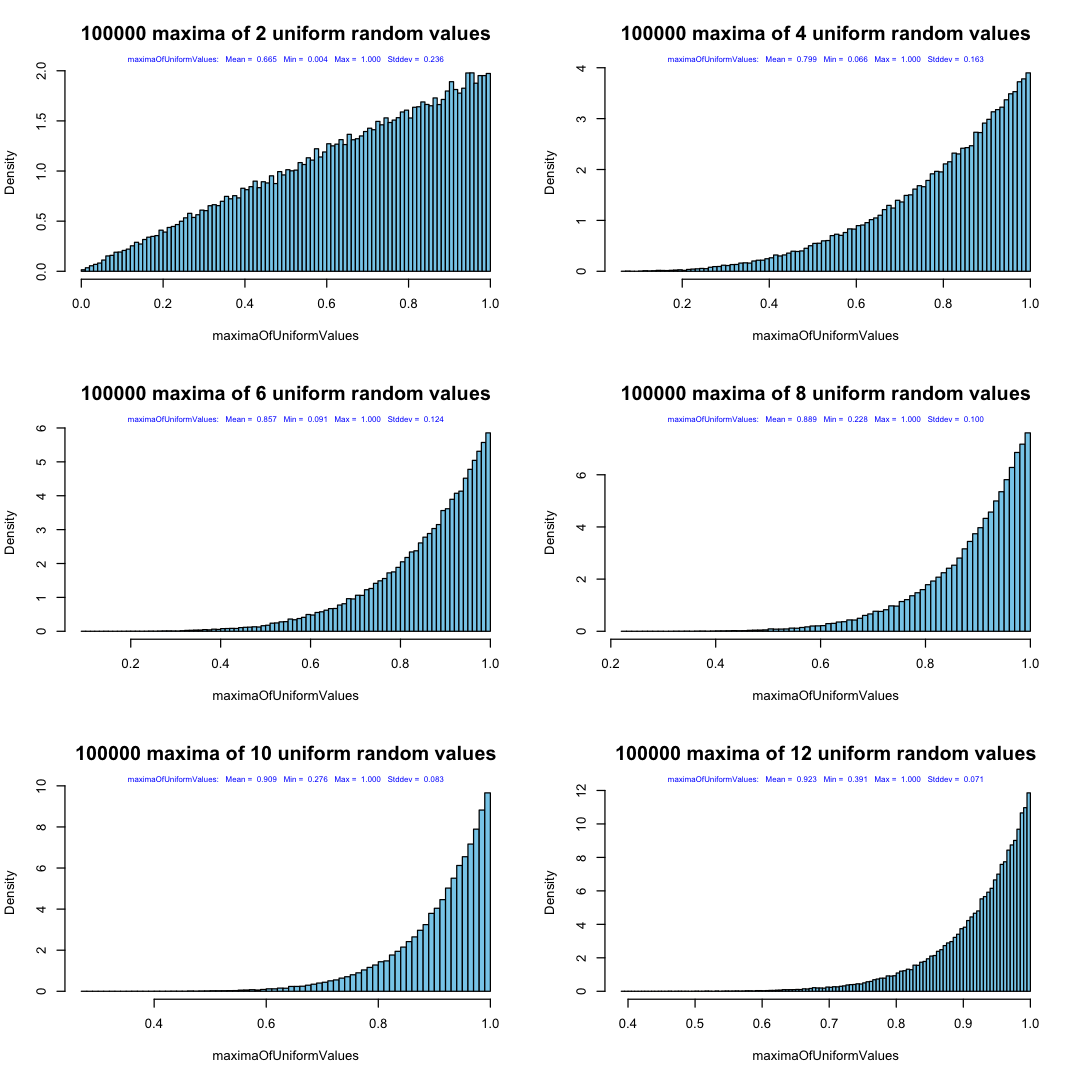

In [188]:
options( repr.plot.width=9, repr.plot.height=9 )

opar = par(mfrow=c(3,2))

options( repr.plot.width=9, repr.plot.height=9 )

# Maxima of uniform random variables

N = 100000
SumSizes = seq(2,12,by=2)

for (M in SumSizes) {
   maximaOfUniformValues = apply( matrix( runif(M*N), M,N), 2, max )
   hist( maximaOfUniformValues,
        probability=TRUE,
        breaks=100,
        cex.lab=1.0, cex.main=1.5, col="skyblue",
        main=sprintf("%d maxima of %d uniform random values",N,M))
   annotate_plot_with_parameters( maximaOfUniformValues, 0, cex=0.4)
}
par(opar)

# Power Laws

## The Exponential, Pareto, and ... Lognormal ... Distributions are often called "Power Law" distributions.

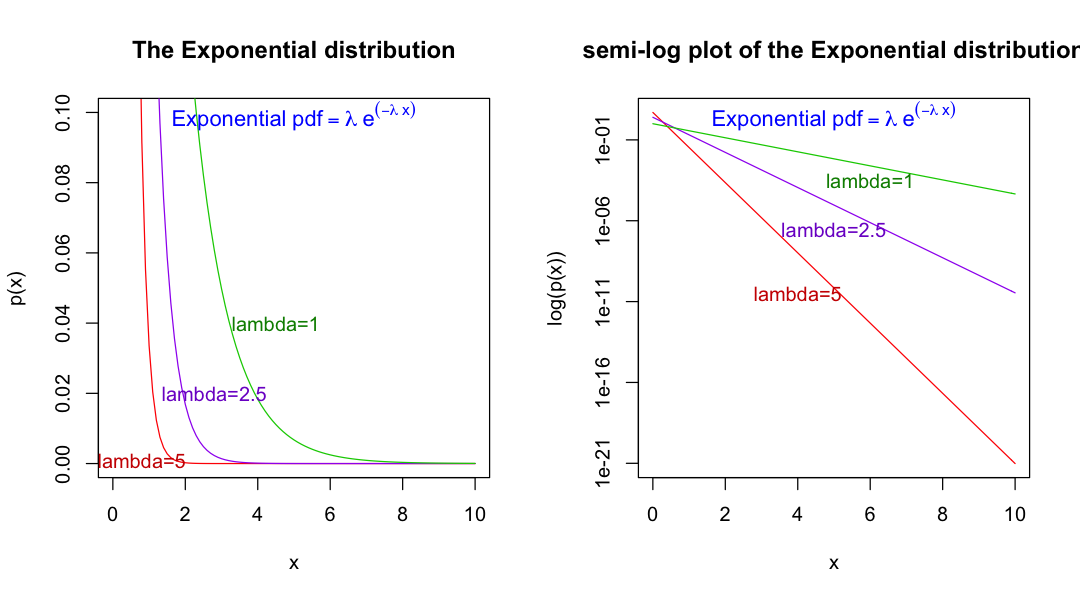

In [189]:
options( repr.plot.width=9, repr.plot.height=5 )

opar = par( mfrow=c(1,2) )

curve( dexp(x, rate=5.0), 1e-3, 10, ylim=c(0,0.1),
      col="red",  ylab="p(x)", xlab="x",
      main="The Exponential distribution")
curve( dexp(x, rate=2.5), 1e-3, 10, col="purple", ylab="", add=TRUE)
curve( dexp(x, rate=1.0), 1e-3, 10, col="green3", ylab="", add=TRUE)

text(0.8,0.001,"lambda=5", col="red3")
text(2.8,0.02,"lambda=2.5", col="purple3")
text(4.5,0.04,"lambda=1", col="green4")

mtext( expression( Exponential ~ pdf == lambda ~ e^(- lambda ~ x) ), col="blue", cex=1.1, line=-1.5 )

curve( dexp(x, rate=5.0), 1e-3, 10,
      col="red",  log="y", ylab="log(p(x))", xlab="x",
      main="semi-log plot of the Exponential distribution")
curve( dexp(x, rate=2.5), 1e-3, 10, col="purple", log="y", ylab="", add=TRUE)
curve( dexp(x, rate=1.0), 1e-3, 10, col="green3", log="y", ylab="", add=TRUE)

text(4,3e-11,"lambda=5", col="red3")
text(5,3e-7,"lambda=2.5", col="purple3")
text(6,3e-4,"lambda=1", col="green4")

mtext( expression( Exponential ~ pdf == lambda ~ e^(- lambda ~ x) ), col="blue", cex=1.1, line=-1.5 )

par(opar)

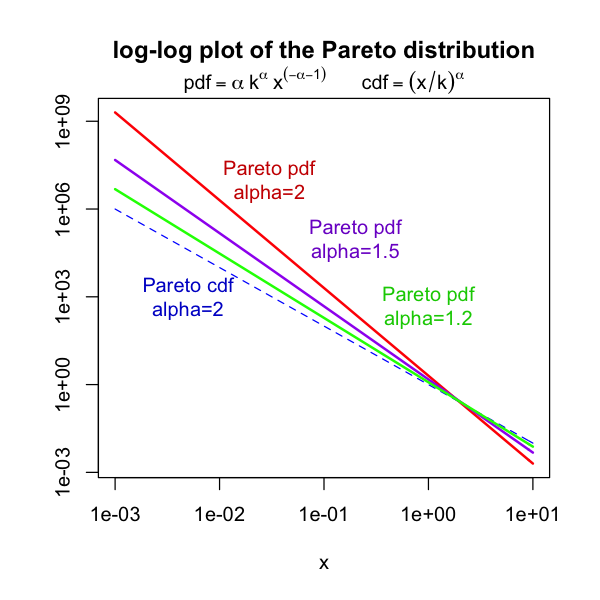

In [190]:
# Pareto distribution cdf and pdf
options( repr.plot.width=5, repr.plot.height=5 )

ppareto = function(x, alpha=2, k=1)  (x/k)^(-alpha)
dpareto = function(x, alpha=2, k=1)  alpha * k^alpha * x^(-alpha-1)

curve( dpareto, 1e-3, 10, col="red",  lwd=2, log="xy", ylab="", main="log-log plot of the Pareto distribution")
curve( ppareto, 1e-3, 10, col="blue", lty=2, log="xy", ylab="", add=TRUE)
curve( dpareto(x,alpha=1.5), 1e-3, 10, lwd=2, col="purple", log="xy", ylab="", add=TRUE)
curve( dpareto(x,alpha=1.2), 1e-3, 10, lwd=2, col="green", log="xy", ylab="", add=TRUE)

text(5e-3,1e3,"Pareto cdf\nalpha=2", col="blue3", lwd=0.5)
text(3e-2,1e7,"Pareto pdf\nalpha=2", col="red3", lwd=2)
text(2e-1,1e5,"Pareto pdf\nalpha=1.5", col="purple3", lwd=2)
text(1e-0,5e2,"Pareto pdf\nalpha=1.2", col="green3", lwd=2)
          
mtext( expression( pdf == alpha ~ k^alpha ~ x^(-alpha-1) ~ ~ ~ ~ ~ ~ ~ cdf == (x/k)^alpha ))



## Lognormal distributions are often mistaken for Power law distributions (!)

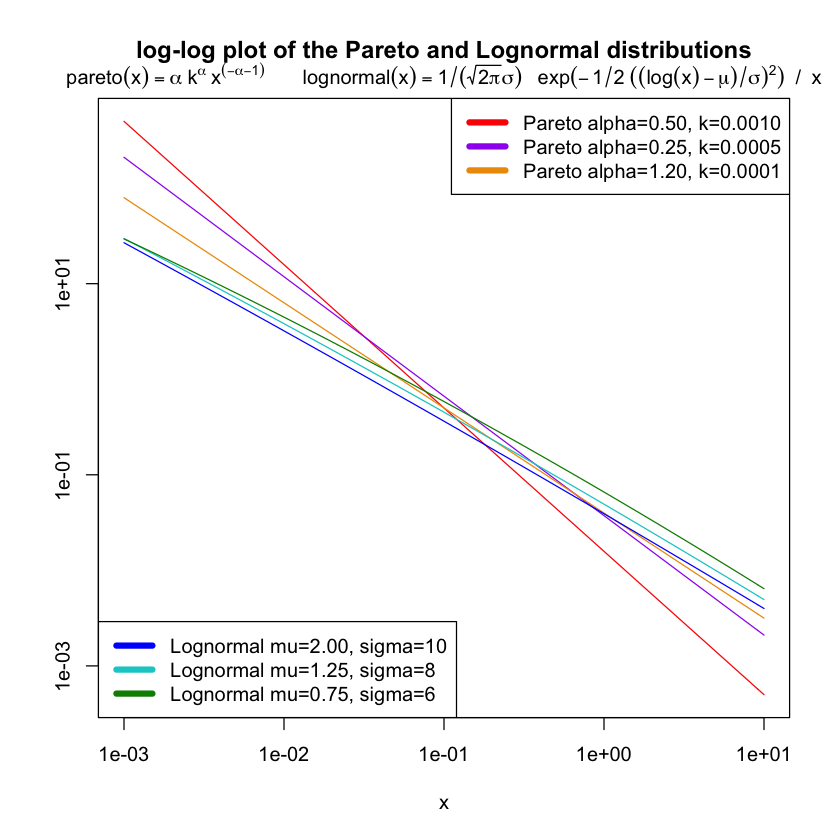

In [191]:
title = "log-log plot of the Pareto and Lognormal distributions"

options( repr.plot.width=7, repr.plot.height=7 )

ParetoCurves = c("Pareto alpha=0.50, k=0.0010", "Pareto alpha=0.25, k=0.0005", "Pareto alpha=1.20, k=0.0001")
ParetoColors = c("red","purple", "orange2")

ppareto = function(x, alpha=2, k=1)  (x/k)^(-alpha)
dpareto = function(x, alpha=2, k=1)  alpha * k^alpha * x^(-alpha-1)

curve( dpareto(x,alpha=0.5, k=0.0010), 1e-3, 10, col=ParetoColors[1], log="xy", ylab="", main=title)
curve( dpareto(x,alpha=0.25,k=0.0005), 1e-3, 10, col=ParetoColors[2], log="xy", ylab="", add=TRUE)
curve( dpareto(x,alpha=0.1, k=0.0001), 1e-3, 10, col=ParetoColors[3], log="xy", ylab="", add=TRUE)
mtext( expression( pareto(x) == alpha ~ k^alpha ~ x^(-alpha-1) ~ "     " ~
                  lognormal(x) == 1/(sqrt(2*pi) * sigma) ~ " " ~ exp(-1/2 ~ ((log(x)-mu)/sigma)^2) ~ " / " ~ x),
      side=3, line=0.2)

    
LognormalCurves = c("Lognormal mu=2.00, sigma=10", "Lognormal mu=1.25, sigma=8", "Lognormal mu=0.75, sigma=6")
LognormalColors = c("blue", "cyan3", "green4")

curve( dlnorm(x,meanlog=2.00, sdlog=10),1e-3, 10, col=LognormalColors[1], log="xy", ylab="", add=TRUE)
curve( dlnorm(x,meanlog=1.25, sdlog=8), 1e-3, 10, col=LognormalColors[2], log="xy", ylab="", add=TRUE)
curve( dlnorm(x,meanlog=0.75, sdlog=6), 1e-3, 10, col=LognormalColors[3], log="xy", ylab="", add=TRUE)

    
legend( "topright",   ParetoCurves,    col=ParetoColors,    lwd=5 )
legend( "bottomleft", LognormalCurves, col=LognormalColors, lwd=5 )



# Higher-Dimensional Distributions

## The bivariate Normal distribution

Random variables, and distributions, can be $n$-dimensional.  Galton's bivariate normal distribution is an important example.

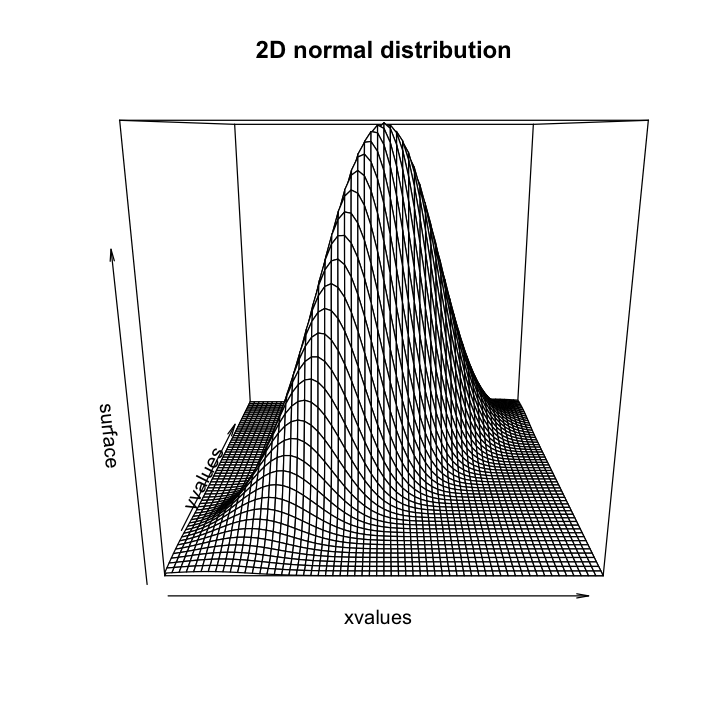

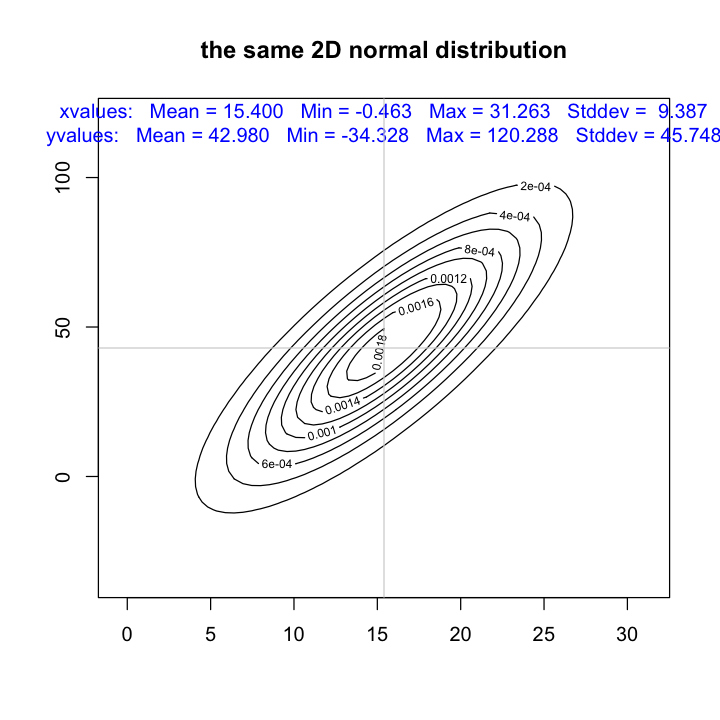

In [192]:
options( repr.plot.width=6, repr.plot.height=6 )

data(cars)

X = as.matrix(cars)
means  = apply(X, 2, mean)
sigmas = apply(X, 2, sd)
n = dim(C)[1]
p = dim(C)[2]

Sigma = cov(X)  # covariance matrix
detSigma = det(Sigma)

W = solve(Sigma)  #  This is R's way to compute:  inverse(Sigma)

gaussian = function(xvec) {
     1 / sqrt(2*pi)^2 / sqrt(detSigma) *
         exp( -1/2 * ( t(xvec-means) %*% W %*% (xvec-means) )[1,1] )
}

# generate a surface, filled with heights of a 2D Gaussian

nvalues = 61
xvalues = seq(-3,3, length=nvalues) * sigmas[1] + means[1]
yvalues = seq(-3,3, length=nvalues) * sigmas[2] + means[2]

surface = matrix(0, nvalues, nvalues)
for (i in 1:nvalues) {
   for (j in 1:nvalues) {
      surface[i,j] = gaussian( c(xvalues[i],yvalues[j]) )
   }
}

# plot the 2D Gaussian ("bi-variate normal distribution")

persp(surface, x=xvalues, y=yvalues, main="2D normal distribution")

contour(surface, x=xvalues, y=yvalues, main="the same 2D normal distribution")

annotate_plot_with_parameters(xvalues,-1)
annotate_plot_with_parameters(yvalues,-2)
abline(v=mean(xvalues),col="lightgray")
abline(h=mean(yvalues),col="lightgray")




We can define a $p$-dimensional Gaussian function in the following way.
Let $\boldsymbol{x}$ be a $p$-dimensional value,
$\mu$ be a $p$-dimensional vector of means,
and
$\Sigma$ be a positive definite $p \times p$ covariance matrix.
Then
$$
g({\boldsymbol{x}}, {\boldsymbol{\mu}}, \Sigma) ~~=~~
\frac{1}{{(2\,\pi)}^{p/2}} ~
\frac{1}{\sqrt{\det\,\Sigma}} ~
\exp\left({ \, -\frac{1}{2} \;
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})'}
\, \Sigma^{-1} \,
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})}
 \, }\right) .
$$
Here we require $\Sigma$ to be positive definite so that its determinant is positive and the square root is defined.
If we let $W = \Sigma^{-1}$ be the inverse of the covariance matrix,
we get the commonly-used formula
$$
g({\boldsymbol{x}}, {\boldsymbol{\mu}}, W^{-1}) ~~=~~
\frac{1}{{(2\,\pi)}^{p/2}} ~
\sqrt{{\det\,W}} ~
\exp\left({ \, -\frac{1}{2} \;
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})'}
\, W \,
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})}
 \, }\right) .
$$
The theory of linear models makes heavy use of higher-dimensional Normal distributions.



Covariance matrix for the Iris data:
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    0.6856935  -0.0424340    1.2743154   0.5162707
Sepal.Width    -0.0424340   0.1899794   -0.3296564  -0.1216394
Petal.Length    1.2743154  -0.3296564    3.1162779   1.2956094
Petal.Width     0.5162707  -0.1216394    1.2956094   0.5810063

signs of entries in Covariance matrix:
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length            1          -1            1           1
Sepal.Width            -1           1           -1          -1
Petal.Length            1          -1            1           1
Petal.Width             1          -1            1           1

Correlation matrix for the Iris data:
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Pe

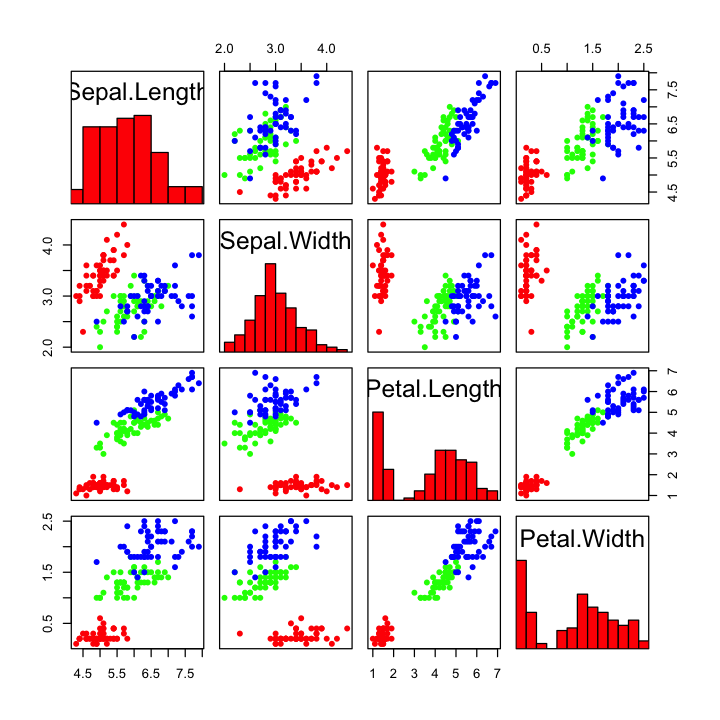

In [193]:
data(iris)

cat("Covariance matrix for the Iris data:\n")

print( cov(iris[,1:4]) )


cat("\nsigns of entries in Covariance matrix:\n")

print( sign(cov(iris[,1:4])) )


cat("\nCorrelation matrix for the Iris data:\n")

print( cor(iris[,1:4]) )

cat("\nThe correlation matrix for the Iris data summarizes the slopes of pairwise plots:\n")

species_number = unclass(iris$Species)
colors = c("red","green","blue")

panel.hist = function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, ...)
}

pairs(iris[,1:4], col=colors[species_number], pch=16, diag.panel = panel.hist )

